# Testing Iterative Extraction

In [1]:
from utils.data import read_json_file, print_json_structure
hpo_data = read_json_file('data/dataset/mine_hpo.json')
print(len(hpo_data))
print_json_structure(hpo_data)
truth = hpo_data["53"]["phenotypes"]
ground_truth = []
for item in truth:
    ground_truth.append(item["phenotype_name"])
# print(len(ground_truth))

116
Dictionary:
  1 (dict): 
  Dictionary:
    clinical_text (str): 
    phenotypes (list): 
    List:
      Item 0 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 1 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 2 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 3 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 4 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 5 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 6 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
      Item 7 (dict): 
      Dictionary:
        phenotype_name (str): 
        hpo_id (str): 
  2 (dict): 
  Dictionary:
    clinical_text (str): 
    phenotypes (list): 
    List:
      Item 0 (dict): 
      Dictionary:
        phenotype_

In [3]:
def load_mistral_llm_client():
    """
    Load a Mistral 24B LLM client configured with default cache directories
    and assigned to cuda:0 device.
    
    Returns:
        LocalLLMClient: Initialized LLM client for Mistral 24B
    """
    from utils.llm_client import LocalLLMClient
    
    # Default cache directory from mine_hpo.py
    default_cache_dir = "/u/zelalae2/scratch/rdma_cache"
    
    # Initialize and return the client with specific configuration
    llm_client = LocalLLMClient(
        model_type="mistral_24b",  # Explicitly request mistral_24b model
        device="cuda:0",           # Assign to first GPU (cuda:0)
        cache_dir=default_cache_dir,
        temperature=0.1            # Default temperature from mine_hpo.py
    )
    
    return llm_client

llm_client = load_mistral_llm_client()

Initialized ModelLoader with cache directory: /shared/rsaas/jw3/rare_disease/model_cache
Loading LLM!
Device configuration: cuda:0
Using device map: {'': 'cuda:0'}
Loading 70B model with quantization: mistral_24b
Generated cache path: /shared/rsaas/jw3/rare_disease/model_cache/Mistral-Small-24B-Instruct-2501_4bit_nf4
Valid cache found at /shared/rsaas/jw3/rare_disease/model_cache/Mistral-Small-24B-Instruct-2501_4bit_nf4
Loading cached quantized model from /shared/rsaas/jw3/rare_disease/model_cache/Mistral-Small-24B-Instruct-2501_4bit_nf4


/home/johnwu3/miniconda3/envs/hporag/lib/python3.10/site-packages/transformers/quantizers/auto.py:206: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)
Loading checkpoint shards: 100%|██████████| 3/3 [02:23<00:00, 47.83s/it]
Device set to use cuda:0


Hello! I'm here to help. How can I assist you today? If you have any medical or biomedical questions, or need help understanding medical contexts, feel free to ask. Here are a few examples of how I can help:

- Explain medical terms or concepts
- Provide information on diseases, symptoms, and treatments
- Offer insights into medical procedures and tests
- Discuss healthcare systems and practices
- Answer questions related to biomedical research and studies

Please note that while I strive to provide accurate and helpful information, I am an artificial intelligence and my knowledge cutoff is 2023, and I don't have real-time web browsing capabilities or personal experiences. For medical advice, always consult a healthcare professional.

What would you like to know or discuss?


In [17]:

def load_llama70b_client():
    """
    Load a LLAMA-70B LLM client configured with default cache directories
    and assigned to cuda:0 device.
    
    Returns:
        LocalLLMClient: Initialized LLM client for LLAMA-70B
    """
    from utils.llm_client import LocalLLMClient
    
    # Default cache directory from mine_hpo.py
    default_cache_dir = "/shared/rsaas/jw3/rare_disease/model_cache"
    
    # Initialize and return the client with specific configuration
    llm_client = LocalLLMClient(
        model_type="llama_70b",     # Explicitly request llama_70b model
        device="cuda:6",           # Assign to first GPU (cuda:0)
        cache_dir=default_cache_dir,
        temperature=0.1            # Default temperature from mine_hpo.py
    )
    
    return llm_client
llama_client = load_llama70b_client()

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


Initialized ModelLoader with cache directory: /shared/rsaas/jw3/rare_disease/model_cache
Loading LLM!
Device configuration: cuda:6
Using device map: {'': 'cuda:6'}
Loading 70B model with quantization: llama_70b
Generated cache path: /shared/rsaas/jw3/rare_disease/model_cache/OpenBioLLM-Llama3-70B_4bit_nf4
Valid cache found at /shared/rsaas/jw3/rare_disease/model_cache/OpenBioLLM-Llama3-70B_4bit_nf4
Loading cached quantized model from /shared/rsaas/jw3/rare_disease/model_cache/OpenBioLLM-Llama3-70B_4bit_nf4


/home/johnwu3/miniconda3/envs/hporag/lib/python3.10/site-packages/transformers/quantizers/auto.py:195: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)
Loading checkpoint shards: 100%|██████████| 8/8 [06:25<00:00, 48.22s/it]


Valid cache found at /shared/rsaas/jw3/rare_disease/model_cache/OpenBioLLM-Llama3-70B_4bit_nf4


Device set to use cuda:6


Hello! I'm here to help answer any questions you may have. Please go ahead and ask your question.  Note: Since this is an open-ended question, I will provide a general response without the need for format constraints.


# Extractors

In [4]:
from hporag.entity import BaseEntityExtractor
import json
import pandas as pd
import numpy as np
import re
from typing import List, Dict, Any, Optional, Tuple
from datetime import datetime
from fuzzywuzzy import fuzz
class IterativeLLMEntityExtractor(BaseEntityExtractor):
    """Entity extraction pipeline using iterative LLM passes.
    
    Performs multiple passes with the LLM, accumulating unique entities across passes.
    Stops early if no new entities are found or after reaching the maximum number of iterations.
    """
    
    def __init__(self, llm_client, system_message: str, max_iterations: int = 3):
        """Initialize the iterative LLM entity extractor.
        
        Args:
            llm_client: LLM client for querying the language model
            system_message: System message to use for all LLM queries
            max_iterations: Maximum number of iterations to perform
        """
        self.llm_client = llm_client
        self.system_message = system_message
        self.max_iterations = max_iterations

    def extract_entities(self, text: str) -> List[str]:
        """Extract entities from text using iterative LLM passes.
        
        Args:
            text: Input clinical text
            
        Returns:
            List of extracted entities after iterative refinement
        """
        # Initialize with empty set of entities
        current_entities = set()
        
        for iteration in range(self.max_iterations):
            # Create prompt with already extracted entities
            if iteration == 0:
                # First pass - no previous entities
                prompt = text
            else:
                # Subsequent passes - include previously extracted entities
                already_extracted = ", ".join(sorted(current_entities))
                prompt = self._create_iterative_prompt(text, already_extracted, iteration)
            
            # Query LLM
            findings_text = self.llm_client.query(prompt, self.system_message)
            # print("Findings text:")
            # print(findings_text)
            # print("----------------")
            if not findings_text:
                break
                
            # Extract entities from this pass
            iteration_entities = set(self._extract_findings_from_response(findings_text))
            
            # Combine with previous entities (union)
            combined_entities = current_entities.union(iteration_entities)
            print("Combined entities:", combined_entities)
            # Check if we've converged (no new entities)
            if combined_entities == current_entities:
                print(f"Early stopping at iteration {iteration+1}: No new entities found.")
                break
                
            # Calculate new entities found in this iteration
            new_entities = combined_entities - current_entities
            if new_entities:
                print(f"Iteration {iteration+1}: Found {len(new_entities)} new entities")
            else:
                print(f"Iteration {iteration+1}: No new entities found.")
                
            # Update current entities
            current_entities = combined_entities
        
        # Convert set back to list for return
        return list(current_entities)

    def _create_iterative_prompt(self, original_text: str, already_extracted: str, iteration: int) -> str:
        """Create a prompt for iterative entity extraction.
        
        Args:
            original_text: The original clinical text
            already_extracted: Comma-separated list of already extracted entities
            iteration: Current iteration number (0-based)
            
        Returns:
            Formatted prompt for the current iteration
        """
        return (
            f"{original_text}\n\n"
            f"I have already extracted the following terms: {already_extracted}.\n"
            f"Please examine the clinical text again carefully (iteration {iteration+1} of up to {self.max_iterations}) "
            f"and identify any additional genetic inheritance patterns, anatomical anomalies, clinical symptoms, diagnostic findings, lab test results, and specific conditions or syndromess that were missed in the previous extractions. "
            f"Find terms that aren't in the already extracted list. Include appropriate context based only on the passage."
            f"Return the extracted terms in a JSON object with a single key 'findings', which contains the list of extracted terms spelled correctly."
        )

    def process_batch(self, texts: List[str]) -> List[List[str]]:
        """Process a batch of texts for entity extraction.
        
        Args:
            texts: List of clinical texts to process
            
        Returns:
            List of lists containing extracted entities for each text
        """
        results = []
        for text in texts:
            entities = self.extract_entities(text)
            results.append(entities)
        return results

    def _extract_findings_from_response(self, response_content: str) -> List[str]:
        """Extract findings from LLM response.
        
        Args:
            response_content: Raw LLM response text
            
        Returns:
            List of extracted entities
        """
        sanitized = response_content.replace("```", "").strip()
        start = sanitized.find("{")
        end = sanitized.rfind("}")
        if start == -1 or end == -1 or start > end:
            return []

        json_str = sanitized[start:end+1]
        try:
            data = json.loads(json_str)
            findings = data.get("findings", [])
            return findings if isinstance(findings, list) else []
        except json.JSONDecodeError:
            return []


Combined entities: {'Escherichia coli', 'pallor', 'fasting sugar', 'serum calcium', 'sensorineural hearing loss', 'discontinuity of lamina densa', 'dyspnoea', 'medical renal disease', 'proteinuria', 'focal segmental glomerulonephritis', 'breathlessness', 'white cell count', 'diffuse thickening of glomerular capillary wall', 'left ventricular hypertrophy', 'sinus tachycardia', 'serum creatinine', 'dilated left ventricular cavity', 'hypertension', 'mitral regurgitation', 'cardiomegaly', 'hearing loss', 'anisocytosis', 'oil droplet sign', 'hypertensive changes', 'polymorphs', 'dysuria', 'haemoglobin', 'suprapubic tenderness', 'blood urea', 'basket weaving pattern', 'disruption of glomerular basement membrane', 'low-grade fever', 'pedal oedema', 'loss of corticomedullary differentiation', 'erythrocyte sedimentation rate', 'cortical echogenecity', 'mean corpuscular volume', 'vomiting', 'uric acid', 'posterior lenticonus', 'bilateral anterior lentiglobus', 'normocytic normochromic anaemia', 

In [5]:
import re
from typing import List, Dict, Optional, Union, Any
from datetime import datetime


class ContextExtractor:
    """
    Extracts relevant context for entities from clinical notes.
    
    This class is responsible for finding the most relevant sentences or sections
    in a clinical note that provide context for extracted entities. It can be used
    by different components in the pipeline to ensure consistent context extraction.
    """
    
    def __init__(self, debug: bool = False):
        """
        Initialize the context extractor.
        
        Args:
            debug: Whether to print debug information
        """
        self.debug = debug
    
    def _debug_print(self, message: str, level: int = 0):
        """Print debug messages if debug mode is enabled."""
        if self.debug:
            indent = "  " * level
            print(f"{datetime.now().strftime('%H:%M:%S')} | {indent}{message}")
    
    def extract_sentences(self, text: str) -> List[str]:
        """
        Split clinical text into sentences.
        
        Args:
            text: Clinical note text
            
        Returns:
            List of sentences extracted from the text
        """
        # First split by common sentence terminators while preserving them
        sentence_parts = []
        for part in re.split(r'([.!?])', text):
            if part.strip():
                if part in '.!?':
                    if sentence_parts:
                        sentence_parts[-1] += part
                else:
                    sentence_parts.append(part.strip())
        
        # Then handle other clinical note delimiters like line breaks and semicolons
        sentences = []
        for part in sentence_parts:
            # Split by semicolons and newlines
            for subpart in re.split(r'[;\n]', part):
                if subpart.strip():
                    sentences.append(subpart.strip())
        
        self._debug_print(f"Extracted {len(sentences)} sentences from text")
        return sentences
    
    def find_entity_context(self, entity: str, sentences: List[str], 
                          window_size: int = 0) -> Optional[str]:
        """
        Find the most relevant context for a given entity.
        
        Args:
            entity: Entity to find context for
            sentences: List of sentences from the clinical note
            window_size: Number of additional sentences to include (default: 0 - just the matching sentence)
            
        Returns:
            The most relevant context or None if no match found
        """
        entity_lower = entity.lower()
        
        # Try exact matching first
        for i, sentence in enumerate(sentences):
            if entity_lower in sentence.lower():
                # Found exact match - just return the sentence for token efficiency
                return sentence.strip()
        
        # If no exact match, try fuzzy matching based on word overlap
        entity_words = set(re.findall(r'\b\w+\b', entity_lower))
        if not entity_words:
            return None
            
        best_match = None
        best_score = 0
        
        for sentence in sentences:
            sentence_words = set(re.findall(r'\b\w+\b', sentence.lower()))
            if not sentence_words:
                continue
                
            common_words = entity_words & sentence_words
            # Calculate Jaccard similarity
            similarity = len(common_words) / (len(entity_words) + len(sentence_words) - len(common_words))
            
            # Prioritize sentences with higher word overlap
            overlap_ratio = len(common_words) / len(entity_words) if entity_words else 0
            
            # Combined score giving more weight to overlap ratio
            score = (0.7 * overlap_ratio) + (0.3 * similarity)
            
            if score > best_score:
                best_score = score
                best_match = sentence
        
        # If we found a reasonably good match
        if best_score > 0.3 and best_match:
            return best_match.strip()
        
        return None
    
    def extract_contexts(self, entities: List[str], text: str, 
                        window_size: int = 0) -> List[Dict[str, str]]:
        """
        Extract contexts for a list of entities from a clinical note.
        
        Args:
            entities: List of entities to find context for
            text: Clinical note text
            window_size: Number of additional sentences to include (default: 0 - just the matching sentence)
            
        Returns:
            List of dictionaries with entity and context pairs
        """
        self._debug_print(f"Extracting contexts for {len(entities)} entities")
        
        # Extract sentences once
        sentences = self.extract_sentences(text)
        
        # Find context for each entity
        results = []
        for entity in entities:
            context = self.find_entity_context(entity, sentences, window_size)
            results.append({
                "entity": entity,
                "context": context or ""  # Empty string if no context found
            })
            
            self._debug_print(f"Entity: '{entity}'", level=1)
            self._debug_print(f"Context: '{context}'", level=2)
        
        return results
    
    def batch_extract_contexts(self, batch_entities: List[List[str]], 
                             texts: List[str], 
                             window_size: int = 0) -> List[List[Dict[str, str]]]:
        """
        Extract contexts for multiple batches of entities from multiple clinical notes.
        
        Args:
            batch_entities: List of lists of entities
            texts: List of clinical note texts
            window_size: Number of additional sentences to include (default: 0 - just the matching sentence)
            
        Returns:
            List of lists of dictionaries with entity and context pairs
        """
        if len(batch_entities) != len(texts):
            raise ValueError(f"Mismatch between number of entity batches ({len(batch_entities)}) and texts ({len(texts)})")
            
        results = []
        for entities, text in zip(batch_entities, texts):
            batch_results = self.extract_contexts(entities, text, window_size)
            results.append(batch_results)
            
        return results


# Standalone function for simpler usage
def extract_entity_contexts(entities: List[str], text: str, window_size: int = 0) -> List[Dict[str, str]]:
    """
    Utility function to extract contexts for entities from a clinical note.
    
    Args:
        entities: List of entities to find context for
        text: Clinical note text
        window_size: Number of additional sentences to include (default: 0 - just the matching sentence)
        
    Returns:
        List of dictionaries with entity and context pairs
    """
    extractor = ContextExtractor()
    return extractor.extract_contexts(entities, text, window_size)

In [29]:

# rerun whole pipeline
text =  "A 35-year-old woman presented to the medical emergency department with low-grade fever for 3 weeks, vomiting for 1 week and anuria for 3 days. She also reported dysuria and breathlessness for 1 week. There was no history of decreased urine output, dialysis, effort intolerance, chest pain or palpitation, dyspnoea and weight loss. Menstrual history was within normal limit but she reported gradually progressive loss of appetite. Family history included smoky urine in her younger brother in his childhood, who died in an accident. On general survey, the patient was conscious and alert. She was dyspnoeic and febrile. Severe pallor was present with mild pedal oedema. Blood pressure was 180/100 mm Hg and pulse rate of 116/min regular. No evidence of jaundice, clubbing cyanosis or lymphadenopathy was found. Physical examination revealed bibasilar end-inspiratory crepitations in lungs and suprapubic tenderness. There was no hepatosplenomegaly or ascites. Cardiac examination was normal. She was found to have severe bilateral hearing loss, which was gradually progressive for 5 years. The fundi were bilaterally pale. The patient was referred to the department of ophthalmology for a comprehensive eye examination. Her visual acuity was documented as 6/18 in both eyes with no obvious lenticular opacity. Slit-lamp examination showed bilateral anterior lentiglobus with posterior lenticonus. Distant direct ophthalmoscopy revealed oil droplet sign (a suggestive confirmation of the presence of lenticonus); and peripheral retina revealed multiple yellowish white lesion-like flecks in the mid-periphery, and few blot haemorrhages indicative of hypertensive changes. Haemogram showed haemoglobin (Hb) 5.7 g/dL, erythrocyte sedimentation rate 15 mm in first hour, white cell count 17 200/\u00b5L with 82% polymorphs, adequate platelets and mean corpuscular volume 83.3 fL. Peripheral smear showed normocytic normochromic anaemia with mild anisocytosis. Fasting sugar 78 mg/dL, blood urea 325 mg/dL, serum creatinine 11.2 mg/dL and uric acid 8.3 mg/dL. Liver function tests were within normal limit as were serum electrolytes, except serum calcium (conc.) 5.8 mg/dL (adjusted with serum albumin). Lipid profile and iron profile were also normal. HIV and viral markers for HbsAg and hepatitis C virus were non-reactive. ECG showed sinus tachycardia with features of left ventricular hypertrophy and chest X-ray posteroanterior view revealed cardiomegaly. Urinalysis showed full field of pus cells with 35\u201340 RBCs/hpf and 3(+) proteinuria. Urine samples for cultures were sent which reported pure growth of Escherichia coli. Spot urine for protein:creatinine ratio was 2.07 g/g Cr. She underwent pure tone audiometry which revealed features suggestive of severe bilateral sensorineural hearing loss (SHNL). Ultrasound of the abdomen showed bilateral contracted kidneys: right measured 6.7\u00d72.3 cm and left 7.8\u00d73 cm, with increased cortical echogenecity and loss of corticomedullary differentiation, suggestive of medical renal disease. Two-dimensional Echo reported dilated left ventricular cavity with mild mitral regurgitation and ejection fraction of 55%. Renal and skin biopsies were conducted and specimens were sent for light and electron microscopy (EM). Renal tissue on H&E stain was reported as focal segmental glomerulonephritis (FSGS). Ultrathin sections of EM study of renal tissue revealed disruption of glomerular basement membrane (GBM) with diffuse thickening of glomerular capillary wall. Dermal tissue depicted discontinuity of lamina densa with basket weaving pattern under EM."

system_message_I = "You are a rare disease expert with extensive medical knowledge. Carefully review every sentence of the clinical passage to identify terms related to genetic inheritance patterns, anatomical anomalies, clinical symptoms, diagnostic findings, lab test results, and specific conditions or syndromes. Completely ignore negative findings, normal findings (i.e. 'normal' or 'no'), procedures and family history.  Return the extracted terms in a JSON object with a single key 'findings', which contains the list of extracted terms spelled correctly. Ensure the output is concise without any additional notes, commentary, or meta explanations."

# so we can get an idea of the variance across entity extraction.
runs = []
for i in range(1):
    extractor = IterativeLLMEntityExtractor(
        llm_client=llm_client,
        # llm_client=llama_client,
        system_message=system_message_I,
        max_iterations=10 # iterative extractor
    )
    extracted = extractor.process_batch([text])
    runs.append(extracted)

extractor = ContextExtractor(debug=False)
# Extract contexts for all entities
extracted = extractor.batch_extract_contexts(extracted, [text], window_size=1)


Combined entities: {'uremia', 'hyperuricemia', 'Escherichia coli', 'pallor', 'discontinuity of lamina densa', 'sensorineural hearing loss', 'dyspnoea', 'thickening of glomerular capillary wall', 'proteinuria', 'focal segmental glomerulonephritis', 'breathlessness', 'left ventricular hypertrophy', 'hypertension', 'renal disease', 'mitral regurgitation', 'cardiomegaly', 'hearing loss', 'anisocytosis', 'oil droplet sign', 'hypertensive changes', 'dysuria', 'basket weaving pattern', 'suprapubic tenderness', 'disruption of glomerular basement membrane', 'low-grade fever', 'anaemia', 'pedal oedema', 'vomiting', 'posterior lenticonus', 'tachycardia', 'anterior lentiglobus', 'anuria', 'bibasilar end-inspiratory crepitations', 'normocytic normochromic', 'hypocalcemia'}
Iteration 1: Found 35 new entities
Combined entities: {'thickening', 'uremia', 'hyperuricemia', 'Escherichia coli', 'pallor', 'discontinuity of lamina densa', 'sensorineural hearing loss', 'haemorrhages', 'dyspnoea', 'thickening 

In [ ]:
union_of_runs = set()
for extracted in runs:
    union_of_runs = union_of_runs.union(extracted[0])
    print(len(extracted[0]))

68
47
67
52
105


In [14]:
for entity in extracted[0]:
    print(f"{entity['entity']}")
    print(f"Context: {entity['context']}")
    # print()

normocytic normochromic anaemia
Context: Peripheral smear showed normocytic normochromic anaemia with mild anisocytosis.
bibasilar end-inspiratory crepitations
Context: Physical examination revealed bibasilar end-inspiratory crepitations in lungs and suprapubic tenderness.
cardiomegaly
Context: ECG showed sinus tachycardia with features of left ventricular hypertrophy and chest X-ray posteroanterior view revealed cardiomegaly.
dilated left ventricular cavity
Context: Two-dimensional Echo reported dilated left ventricular cavity with mild mitral regurgitation and ejection fraction of 55%.
ejection fraction
Context: Two-dimensional Echo reported dilated left ventricular cavity with mild mitral regurgitation and ejection fraction of 55%.
fasting sugar
Context: Fasting sugar 78 mg/dL, blood urea 325 mg/dL, serum creatinine 11.
glomerular basement membrane
Context: Ultrathin sections of EM study of renal tissue revealed disruption of glomerular basement membrane (GBM) with diffuse thickenin

# Verifier

In [126]:
from typing import List, Dict, Any, Optional, Tuple, Union, Set
import json
import re
import numpy as np
from datetime import datetime


class HPOVerifier:
    """
    Verifies if extracted entities represent valid phenotypes before HPO term matching,
    using LLM verification for all entities.
    """
    
    def __init__(self, embedding_manager, llm_client, debug: bool = False):
        """
        Initialize the HPO verifier.
        
        Args:
            embedding_manager: Embedding manager for retrieving similar phenotypes
            llm_client: LLM client for verification queries
            debug: Whether to print debug information
        """
        self.embedding_manager = embedding_manager
        self.llm_client = llm_client
        self.debug = debug
        self.index = None
        self.embedded_documents = None
        
        # Simplified system message
        self.system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Determine if a given term from a clinical note describes a valid human phenotype "
            "(an observable characteristic, trait, or abnormality). "
            "Please use the retrieved candidates in the clinical note to determine if it represents a valid phenotype."
            "If the entity is just a piece of anatomy without any mention of an abnormality in the entity itself, it is not a phenotype, regardless of what is in the context."
            "\nRespond with ONLY 'YES' if the term is a valid phenotype, or 'NO' if it's not a phenotype "
            "(e.g., procedure, diagnostic test, family history, demographic, temporal marker). "
            "Consider both the term itself AND its context in the clinical note."
        )
        
        # Cache verification results to avoid redundant API calls
        self.verification_cache = {}
        
    def _debug_print(self, message: str, level: int = 0):
        """Print debug messages if debug mode is enabled."""
        if self.debug:
            indent = "  " * level
            print(f"{datetime.now().strftime('%H:%M:%S')} | {indent}{message}")
    
    def prepare_index(self, metadata: List[Dict]):
        """Prepare FAISS index from metadata for similarity search."""
        if self.index is None:
            self._debug_print("Preparing FAISS index for phenotype verification...")
            embeddings_array = self.embedding_manager.prepare_embeddings(metadata)
            self.index = self.embedding_manager.create_index(embeddings_array)
            self.embedded_documents = metadata
            self._debug_print(f"Index prepared with {len(metadata)} embedded documents")
    
    def _retrieve_similar_phenotypes(self, entity: str, k: int = 10) -> List[Dict]:
        """Retrieve similar phenotypes from the HPO ontology for context."""
        if self.index is None:
            raise ValueError("Index not prepared. Call prepare_index() first.")
            
        # Embed the query
        query_vector = self.embedding_manager.query_text(entity).reshape(1, -1)
        
        # Search for similar items
        distances, indices = self.embedding_manager.search(query_vector, self.index, k)
        
        # Extract unique metadata
        similar_phenotypes = []
        seen_metadata = set()
        
        for idx in indices[0]:
            metadata = self.embedded_documents[idx]['unique_metadata']
            metadata_str = json.dumps(metadata)
            
            if metadata_str not in seen_metadata:
                seen_metadata.add(metadata_str)
                similar_phenotypes.append({
                    'term': metadata.get('info', ''),
                    'hp_id': metadata.get('hp_id', '')
                })
                
        return similar_phenotypes
    
    def verify_entity(self, entity: str, context: Optional[str] = None) -> bool:
        """
        Verify if a single entity represents a valid phenotype using LLM with similar examples and context.
        
        Args:
            entity: Entity text to verify
            context: Original sentence containing the entity
            
        Returns:
            True if the entity is a valid phenotype, False otherwise
        """
        # Create a cache key that includes both entity and context
        cache_key = f"{entity}::{context}"
        
        # Check cache first
        if cache_key in self.verification_cache:
            is_phenotype = self.verification_cache[cache_key]
            self._debug_print(f"Cache hit for '{entity}': {is_phenotype}", level=1)
            return is_phenotype
            
        self._debug_print(f"Verifying entity: '{entity}'", level=1)
        
        # Retrieve similar phenotypes for context
        similar_phenotypes = self._retrieve_similar_phenotypes(entity)
        
        # Format context items
        context_items = []
        for phenotype in similar_phenotypes[:5]:  # Use top 5 for context
            context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM, including the sentence context if available
        context_part = f"Original sentence context: '{context}'\n\n" if context else ""
        
        prompt = (
            f"I need to determine if ENTITY:'{entity}' is a valid human phenotype. "
            f"CONTEXT:"
            f"{context_part}"
            f"Here are some retrieved candidates from the Human Phenotype Ontology to help you make your decision:\n\n"
            f"{context_text}\n\n"
            f"Based on these examples and the original context, is just the ENTITY: '{entity}' a valid human phenotype? "
            f"Respond with ONLY 'YES' if the term is a valid phenotype, or 'NO' if it's not a phenotype "
        )
        
        # Query the LLM
        # print("Prompt:")
        # print(prompt)
        response = self.llm_client.query(prompt, self.system_message)
        # print(response)
        
        # Parse the response (expecting only YES or NO)
        is_phenotype = "yes" in response.lower() and not "no" in response.lower()
        
        # Cache the result
        self.verification_cache[cache_key] = is_phenotype
        
        self._debug_print(f"LLM says '{entity}' is{'' if is_phenotype else ' not'} a phenotype ({response.strip()})", level=2)
        return is_phenotype
    
    def batch_verify(self, entities_with_context: List[Dict[str, str]], batch_size: int = 1) -> List[Dict[str, str]]:
        """
        Verify a list of entities with their contexts and return only valid phenotypes.
        
        Args:
            entities_with_context: List of dicts with 'entity' and 'context' keys
            batch_size: Size of batches for processing (for future optimization)
            
        Returns:
            List of dicts containing valid phenotypes with their contexts
        """
        self._debug_print(f"Verifying {len(entities_with_context)} entities with context")
        valid_phenotypes = []
        
        # Ensure input data is in correct format
        formatted_entries = []
        for item in entities_with_context:
            # Check if item is already a dictionary with 'entity' and 'context' keys
            if isinstance(item, dict) and 'entity' in item:
                formatted_entries.append(item)
            elif isinstance(item, str):
                # If item is a string, assume it's just the entity with no context
                formatted_entries.append({'entity': item, 'context': ''})
            else:
                self._debug_print(f"Skipping invalid entry: {item}")
                continue
        
        # Remove duplicates while preserving order
        unique_entries = []
        seen = set()
        for item in formatted_entries:
            entity = str(item.get('entity', '')).lower().strip()
            context = str(item.get('context', ''))
            
            # Create a unique key for deduplication
            entry_key = f"{entity}::{context}"
            
            if entry_key not in seen and entity:
                seen.add(entry_key)
                unique_entries.append(item)
        
        self._debug_print(f"Found {len(unique_entries)} unique entity-context pairs")
        
        # Process entities individually (can be optimized for batch processing)
        for item in unique_entries:
            entity = item.get('entity', '')
            context = item.get('context', '')
            
            preprocessed_entity = self.preprocess_entity(entity)
            if self.verify_entity(preprocessed_entity, context):
                valid_phenotypes.append(item)
                
        self._debug_print(f"Found {len(valid_phenotypes)} valid phenotypes")
        return valid_phenotypes
    
    def filter_entities(self, batch_data: List[List[Dict[str, str]]]) -> List[List[Dict[str, str]]]:
        """
        Filter multiple batches of entities with contexts to include only valid phenotypes.
        
        Args:
            batch_data: List of lists containing entity-context dictionaries
            
        Returns:
            List of lists containing only valid phenotype entries
        """
        filtered_batch = []
        
        for batch_items in batch_data:
            filtered_items = self.batch_verify(batch_items)
            filtered_batch.append(filtered_items)
            
        return filtered_batch
    def clear_caches(self):
        """Clear all caches to prepare for a fresh evaluation run."""
        self.verification_cache = {}
        self.implied_phenotype_cache = {}
        self.extracted_phenotype_cache = {}
        self.implication_validation_cache = {}
        self.phenotype_validation_cache = {}
        self._debug_print("All caches cleared")
        
    def preprocess_entity(self, entity: str) -> str:
        """
        Minimal preprocessing of entity text.
        
        Args:
            entity: Raw entity text
            
        Returns:
            Preprocessed entity text
        """
        # Remove unnecessary metadata patterns like "(resolved)"
        cleaned = re.sub(r'\s*\([^)]*\)', '', entity)
        
        # Remove extra whitespace
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        
        return cleaned

In [7]:
print(extracted)
for i, extract in enumerate(extracted[0]):
    if len(extract["context"]) < 1:
        extracted[0].remove(extracted[0][i])

batch_entities = []
for entities in extracted:
    batch_entities.append([entity['entity'] for entity in entities])
print(batch_entities)

[[{'entity': 'sinus tachycardia', 'context': 'ECG showed sinus tachycardia with features of left ventricular hypertrophy and chest X-ray posteroanterior view revealed cardiomegaly.'}, {'entity': 'anuria', 'context': 'A 35-year-old woman presented to the medical emergency department with low-grade fever for 3 weeks, vomiting for 1 week and anuria for 3 days.'}, {'entity': 'cortical echogenecity', 'context': '8×3 cm, with increased cortical echogenecity and loss of corticomedullary differentiation, suggestive of medical renal disease.'}, {'entity': 'normocytic normochromic anaemia', 'context': 'Peripheral smear showed normocytic normochromic anaemia with mild anisocytosis.'}, {'entity': 'bibasilar end-inspiratory crepitations', 'context': 'Physical examination revealed bibasilar end-inspiratory crepitations in lungs and suprapubic tenderness.'}, {'entity': 'mitral regurgitation', 'context': 'Two-dimensional Echo reported dilated left ventricular cavity with mild mitral regurgitation and 

In [40]:
import argparse
import torch
from utils.embedding import EmbeddingsManager
from utils.llm_client import LocalLLMClient  # or APILLMClient based on your needs
# from hpo_verifier import HPOVerifier  # Import the updated HPOVerifier

def initialize_rag_verifier():
    # 1. Set up the embedding manager with sentence_transformer and MedEmbed model
    embeddings_manager = EmbeddingsManager(
        model_type="sentence_transformer",
        model_name="abhinand/MedEmbed-small-v0.1",
        device="cuda" if torch.cuda.is_available() else "cpu"
    )
    
    # 2. Initialize your LLM client (local or API-based)
    # Note: You mentioned llm_client is already defined elsewhere, so we'll use it directly
    
    # 3. Create the HPO verifier
    hpo_verifier = HPOVerifier(
        embedding_manager=embeddings_manager,
        llm_client=llm_client,  # Using the pre-defined llm_client
        debug=False  # Set to True for verbose output during testing
    )
    
    # 4. Load the embeddings and prepare the index
    embedded_documents = embeddings_manager.load_documents(
        "data/vector_stores/G2GHPO_metadata_medembed.npy"
    )
    
    # 5. Prepare the index with the loaded embeddings
    hpo_verifier.prepare_index(embedded_documents)
    
    print("RAG-enhanced HPO verifier initialized successfully!")
    return hpo_verifier, embeddings_manager, embedded_documents

# Example usage
if __name__ == "__main__":
    # Setup verifier
    verifier, embeddings_manager, embedded_docs = initialize_rag_verifier()
    
    # Assuming extracted and text are already defined
    # Example: extracted = [...] and text = "Patient clinical note..."
    
    # Get the entity-context pairs from the extractor
    # results = extractor.batch_extract_contexts(batch_entities, [text], window_size=1)
    
    # Process each batch of results
    for i, batch_results in enumerate(extracted):
        print(f"\nProcessing batch {i+1}/{len(extracted)}")
        
        # Verify entities with context
        verified_entities = verifier.batch_verify(batch_results)
        
        # Display results
        print(f"\nVerification results for batch {i+1}:")
        print(f"- Found {len(verified_entities)}/{len(batch_results)} valid phenotypes")
        
        # Print details of verified phenotypes
        print("\nValid phenotypes with context:")
        print(verified_entities)
        for item in verified_entities:
            entity = item['entity']
            context = item['context']
            print(f"- Entity: {entity}")
            print(f"  Context: {context}")
            print()
        
        # Also list entities that were rejected
        rejected_entities = [item for item in batch_results if item not in verified_entities]
        if rejected_entities:
            print("\nRejected entities:")
            for item in rejected_entities:
                print(f"- {item['entity']}")
                print(f" Context: {item['context']}")
    
    # Optional: Use verified entities for HPO term matching
    print("\nNext step would be to match these verified phenotypes to HPO terms")

Loading model...
Model type: sentence_transformer
Model name: abhinand/MedEmbed-small-v0.1
Device: cuda
Initializing SentenceTransformer with model: abhinand/MedEmbed-small-v0.1 on device: cuda
Model successfully moved to cuda
Verifying model by embedding sample text...
Model initialized successfully. Embedding dimension: 384
Data type: <class 'numpy.ndarray'>
Shape or length: (61401,)
First element type: <class 'dict'>
RAG-enhanced HPO verifier initialized successfully!

Processing batch 1/1

Verification results for batch 1:
- Found 51/78 valid phenotypes

Valid phenotypes with context:
[{'entity': 'lenticonus', 'context': 'Slit-lamp examination showed bilateral anterior lentiglobus with posterior lenticonus.'}, {'entity': 'bibasilar end-inspiratory crepitations', 'context': 'Physical examination revealed bibasilar end-inspiratory crepitations in lungs and suprapubic tenderness.'}, {'entity': 'cardiomegaly', 'context': 'ECG showed sinus tachycardia with features of left ventricular h

# Multistage Verifier implementation

In [24]:
from typing import List, Dict, Any, Optional, Tuple, Union, Set
import json
import re
import numpy as np
from datetime import datetime
from fuzzywuzzy import fuzz

class MultiStageHPOVerifier:
    """
    An improved HPO verifier that combines the straightforward prompting from HPOVerifier
    with the multi-stage approach to catch both direct and implied phenotypes.
    """
    
    def __init__(self, embedding_manager, llm_client, debug: bool = False):
        """Initialize the improved multi-stage HPO verifier."""
        self.embedding_manager = embedding_manager
        self.llm_client = llm_client
        self.debug = debug
        self.index = None
        self.embedded_documents = None
        
        # Use HPOVerifier's simpler approach for direct phenotype verification
        self.direct_verification_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Determine if a given term from a clinical note describes a valid human phenotype "
            "(an observable characteristic, trait, or abnormality). "
            "Please use the retrieved candidates in the clinical note to determine if it represents a valid phenotype. "
            "If the entity is just a piece of anatomy without any mention of an abnormality in the entity itself, it is not a phenotype, regardless of what is in the context. "
            "If the entity is just a lab measurement, it is not a phenotype."
            "\nRespond with ONLY 'YES' if the term is a valid phenotype, or 'NO' if it's not a phenotype "
            "Consider both the term itself AND its context in the clinical note."
        )
        
        # Keep the multi-stage approach for implied phenotypes
        self.implied_phenotype_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Determine if the given term IMPLIES a phenotype, even though it's not a direct phenotype itself. "
            "\nEXAMPLES:\n"
            "1. Laboratory test names (e.g., 'white blood cell count', 'hemoglobin level') imply phenotypes if the value is abnormal.\n"
            "2. Diagnostic procedures (e.g., 'kidney biopsy', 'chest X-ray') typically do NOT imply phenotypes unless findings are mentioned.\n"
            "3. Medications (e.g., 'insulin', 'lisinopril') can imply phenotypes related to the condition being treated.\n"
            "4. Microorganisms or pathogens (e.g., 'E. coli', 'Staphylococcus aureus') imply infection phenotypes.\n"
            "\nRespond with ONLY 'YES' if the term implies a phenotype, or 'NO' if it doesn't imply any phenotype. "
            "Consider both the term itself AND its context in the clinical note."
        )
        
        self.extract_phenotype_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "A previous analysis determined that a given term implies a phenotype but is not a direct phenotype itself. "
            "Your task is to precisely identify what specific phenotype is implied by this term. "
            "\nEXAMPLES:\n"
            "1. 'Elevated white blood cell count' implies 'leukocytosis'\n"
            "2. 'Low hemoglobin' implies 'anemia'\n"
            "3. 'E. coli in urine' implies 'urinary tract infection' or 'bacteriuria'\n"
            "4. 'Taking insulin' implies 'diabetes mellitus'\n"
            "\nProvide ONLY the name of the implied phenotype as it would appear in medical terminology. "
            "Be specific and concise. Do not include explanations or multiple options separated by commas or slashes. "
            "Consider the term's context in the clinical note to determine the most accurate phenotype."
        )
        
        # NEW: Add the implication validation system message
        self.implication_validation_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Your task is to validate whether an implied phenotype is reasonable given the original entity and its context. "
            "Be critical and conservative in your assessment. Only validate implications that have strong clinical justification. "
            "\nEXAMPLES of VALID implications:\n"
            "1. Entity: 'E. coli in urine culture' → Implied phenotype: 'bacteriuria' (VALID: specific finding)\n"
            "2. Entity: 'taking insulin daily' → Implied phenotype: 'diabetes mellitus' (VALID: specific medication)\n"
            "\nEXAMPLES of INVALID implications:\n"
            "1. Entity: 'white blood cell count' → Implied phenotype: 'leukocytosis' (INVALID: no value specified)\n"
            "2. Entity: 'retina' → Implied phenotype: 'retinopathy' (INVALID: normal anatomy without abnormality)\n"
            "3. Entity: 'renal tissue' → Implied phenotype: 'glomerulonephritis' (INVALID: too specific without evidence)\n"
            "\nRespond with ONLY 'YES' if the implication is valid, or 'NO' if it's not valid based on the original term and context."
        )
        
        # Modified: Updated system message to focus on phenotype existence rather than HPO matching
        self.phenotype_validation_system_message = (
            "You are a clinical expert specializing in phenotype identification. "
            "Your task is to validate whether a proposed phenotype is a valid medical concept. "
            "Focus only on whether the term represents a real, recognized phenotype in clinical medicine. "
            "Do not worry about whether it matches any formal ontology or coding system. "
            "\nEXAMPLES of VALID phenotypes:\n"
            "1. 'bacteriuria' (VALID: recognized condition of bacteria in urine)\n"
            "2. 'diabetes mellitus' (VALID: well-established medical condition)\n"
            "3. 'macrocephaly' (VALID: recognized condition of abnormally large head)\n"
            "\nEXAMPLES of INVALID phenotypes:\n"
            "1. 'blood abnormality' (INVALID: too vague, not a specific phenotype)\n"
            "2. 'kidney status' (INVALID: not a phenotype, just an anatomical reference)\n"
            "3. 'medication response' (INVALID: too generic, not a specific phenotype)\n"
            "4. 'lab test issue' (INVALID: not a specific phenotype)\n"
            "\nRespond with ONLY 'YES' if the term is a valid, recognized phenotype, or 'NO' if it's not."
        )
        
        # Caches to avoid redundant API calls
        self.verification_cache = {}
        self.implied_phenotype_cache = {}
        self.extracted_phenotype_cache = {}
        self.implication_validation_cache = {}
        self.phenotype_validation_cache = {}
    
    def _debug_print(self, message: str, level: int = 0):
        """Print debug messages if debug mode is enabled."""
        if self.debug:
            indent = "  " * level
            print(f"{datetime.now().strftime('%H:%M:%S')} | {indent}{message}")
    
    def prepare_index(self, metadata: List[Dict]):
        """Prepare FAISS index from metadata for similarity search."""
        if self.index is None:
            self._debug_print("Preparing FAISS index for phenotype verification...")
            embeddings_array = self.embedding_manager.prepare_embeddings(metadata)
            self.index = self.embedding_manager.create_index(embeddings_array)
            self.embedded_documents = metadata
            self._debug_print(f"Index prepared with {len(metadata)} embedded documents")

    def clear_caches(self):
        """Clear all caches to prepare for a fresh evaluation run."""
        self.verification_cache = {}
        self.implied_phenotype_cache = {}
        self.extracted_phenotype_cache = {}
        self.implication_validation_cache = {}
        self.phenotype_validation_cache = {}
        self._debug_print("All caches cleared")

    def _retrieve_similar_phenotypes(self, entity: str, k: int = 10) -> List[Dict]:
        """Retrieve similar phenotypes from the HPO ontology for context."""
        if self.index is None:
            raise ValueError("Index not prepared. Call prepare_index() first.")
            
        # Embed the query
        query_vector = self.embedding_manager.query_text(entity).reshape(1, -1)
        
        # Search for similar items
        distances, indices = self.embedding_manager.search(query_vector, self.index, k=min(800, len(self.embedded_documents)))
        
        # Extract unique metadata
        similar_phenotypes = []
        seen_metadata = set()
        
        for idx, distance in zip(indices[0], distances[0]):
            metadata = self.embedded_documents[idx]['unique_metadata']
            metadata_str = json.dumps(metadata)
            
            if metadata_str not in seen_metadata:
                seen_metadata.add(metadata_str)
                similar_phenotypes.append({
                    'term': metadata.get('info', ''),
                    'hp_id': metadata.get('hp_id', ''),
                    'similarity_score': 1.0 / (1.0 + distance)  # Convert distance to similarity
                })
                
                if len(similar_phenotypes) >= k:
                    break
                    
        return similar_phenotypes
    
    def preprocess_entity(self, entity: str) -> str:
        """
        Minimal preprocessing of entity text - simplified from HPOVerifier approach.
        
        Args:
            entity: Raw entity text
            
        Returns:
            Preprocessed entity text
        """
        if not entity:
            return ""
            
        # Remove unnecessary metadata patterns like "(resolved)"
        cleaned = re.sub(r'\s*\([^)]*\)', '', entity)
        
        # Remove extra whitespace
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        
        return cleaned
    
    def verify_direct_phenotype(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Verify if an entity is a direct phenotype.
        
        Args:
            entity: Entity text to verify
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with verification results
        """
        # Handle empty entities
        if not entity:
            return {
                'is_phenotype': False,
                'confidence': 1.0,
                'method': 'empty_entity'
            }
            
        # Create a cache key
        cache_key = f"direct::{entity}::{context or ''}"
        
        # Check cache first
        if cache_key in self.verification_cache:
            result = self.verification_cache[cache_key]
            self._debug_print(f"Cache hit for direct phenotype '{entity}': {result['is_phenotype']}", level=1)
            return result
            
        self._debug_print(f"Verifying if '{entity}' is a direct phenotype", level=1)
        
        # Retrieve similar phenotypes for context
        similar_phenotypes = self._retrieve_similar_phenotypes(entity)
        
        # Check for exact matches first (optimization)
        for phenotype in similar_phenotypes:
            if self._normalize_text(phenotype['term']) == self._normalize_text(entity):
                self._debug_print(f"Exact match found: '{entity}' matches '{phenotype['term']}' ({phenotype['hp_id']})", level=2)
                result = {
                    'is_phenotype': True,
                    'confidence': 1.0,
                    'method': 'exact_match',
                    'hp_id': phenotype['hp_id'],
                    'matched_term': phenotype['term']
                }
                self.verification_cache[cache_key] = result
                return result
        
        # Format context items
        context_items = []
        for phenotype in similar_phenotypes[:10]:  # Use top 10 for context
            context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM, including the sentence context if available
        context_part = f"Original sentence context: '{context}'\n\n" if context else ""
        
        prompt = (
            f"I need to determine if ENTITY:'{entity}' is a valid human phenotype. "
            f"{context_part}"
            f"Here are some retrieved candidates from the Human Phenotype Ontology to help you make your decision:\n\n"
            f"{context_text}\n\n"
            f"Based on these examples and the original context, is just the ENTITY: '{entity}' a valid human phenotype? "
            f"Respond with ONLY 'YES' if the term is a valid phenotype, or 'NO' if it's not a phenotype."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.direct_verification_system_message)
        
        # Parse the response
        is_phenotype = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        if is_phenotype:
            result = {
                'is_phenotype': True, 
                'confidence': 0.8,
                'method': 'llm_verification'
            }
        else:
            result = {
                'is_phenotype': False,
                'confidence': 0.8,
                'method': 'llm_verification'
            }
        
        # Cache the result
        self.verification_cache[cache_key] = result
        
        self._debug_print(f"LLM says '{entity}' is{'' if is_phenotype else ' not'} a phenotype", level=2)
        return result
    
    def _normalize_text(self, text: str) -> str:
        """Normalize text for comparison."""
        if not text:
            return ""
        
        # Convert to lowercase
        normalized = text.lower()
        
        # Remove punctuation except hyphens
        normalized = re.sub(r'[^\w\s-]', '', normalized)
        
        # Replace multiple spaces with a single space
        normalized = re.sub(r'\s+', ' ', normalized)
        
        return normalized.strip()
    
    def check_implies_phenotype(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Check if an entity that is not a direct phenotype implies a phenotype.
        
        Args:
            entity: Entity text to check
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with results
        """
        # Handle empty entities
        if not entity:
            return {
                'implies_phenotype': False,
                'confidence': 1.0,
                'method': 'empty_entity'
            }
            
        # Create a cache key
        cache_key = f"implies::{entity}::{context or ''}"
        
        # Check cache
        if cache_key in self.implied_phenotype_cache:
            result = self.implied_phenotype_cache[cache_key]
            self._debug_print(f"Cache hit for implied phenotype check '{entity}': {result['implies_phenotype']}", level=1)
            return result
            
        self._debug_print(f"Checking if '{entity}' implies a phenotype", level=1)
        
        # Retrieve similar phenotypes for context
        similar_phenotypes = self._retrieve_similar_phenotypes(entity)
        
        # Format context items
        context_items = []
        for phenotype in similar_phenotypes[:10]:  # Use top 10 for context
            context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM
        context_part = f"Original sentence context: '{context}'\n\n" if context else ""
        context_part = ""
        context_text = ""
        prompt = (
            f"I need to determine if '{entity}' implies a phenotype, even though it's not a direct phenotype itself. "
            f"{context_part}"
            f"Here are some phenotype terms from the Human Phenotype Ontology for context:\n\n"
            f"{context_text}\n\n"
            f"Based on this information and clinical knowledge, does '{entity}' imply a phenotype? "
            f"For example, '"
            f"'E. coli in urine' implies 'urinary tract infection'.\n\n"
            f"Respond with ONLY 'YES' if it implies a phenotype or 'NO' if it doesn't."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.implied_phenotype_system_message)
        
        # Parse the response
        implies_phenotype = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        result = {
            'implies_phenotype': implies_phenotype,
            'confidence': 0.8 if implies_phenotype else 0.7,
            'method': 'llm_verification'
        }
        
        # Cache the result
        self.implied_phenotype_cache[cache_key] = result
        
        self._debug_print(f"LLM says '{entity}' does{'' if implies_phenotype else ' not'} imply a phenotype", level=2)
        return result
    
    def extract_implied_phenotype(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Extract the specific phenotype implied by an entity.
        
        Args:
            entity: Entity text that implies a phenotype
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with results
        """
        # Handle empty entities
        if not entity:
            return {
                'implied_phenotype': None,
                'confidence': 0.0,
                'method': 'empty_entity'
            }
            
        # Create a cache key
        cache_key = f"extract::{entity}::{context or ''}"
        
        # Check cache
        if cache_key in self.extracted_phenotype_cache:
            result = self.extracted_phenotype_cache[cache_key]
            self._debug_print(f"Cache hit for extracting implied phenotype from '{entity}': {result.get('implied_phenotype')}", level=1)
            return result
            
        self._debug_print(f"Extracting implied phenotype from '{entity}'", level=1)
        
        # Use similar phenotypes for context
        similar_phenotypes = self._retrieve_similar_phenotypes(entity)
        
        # Format context items
        context_items = []
        for phenotype in similar_phenotypes[:10]:  # Use top 10 for context
            context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM
        context_part = f"Original sentence context: '{context}'\n\n" if context else ""
        
        prompt = (
            f"The term '{entity}' implies a phenotype but is not a direct phenotype itself. "
            f"{context_part}"
            f"Here are some phenotype terms for context:\n\n"
            f"{context_text}\n\n"
            f"What specific phenotype is implied by '{entity}'? "
            f"For example, "
            f"'hemoglobin of 8 g/dL' implies 'anemia'.\n\n"
            f"Provide ONLY the name of the implied phenotype, without any explanation. "
            f"Use standard medical terminology."
        )
        if entity == "Escherichia coli" or entity == "retina":
            print(context_text)
        # Query the LLM
        response = self.llm_client.query(prompt, self.extract_phenotype_system_message)
        
        # Clean the response
        implied_phenotype = response.strip()
        implied_phenotype = re.sub(r'[.,;:]$', '', implied_phenotype)
        
        # Create result
        result = {
            'implied_phenotype': implied_phenotype,
            'confidence': 0.8 if implied_phenotype else 0.0,
            'method': 'llm_extraction'
        }
        
        # Cache the result
        self.extracted_phenotype_cache[cache_key] = result
        
        self._debug_print(f"LLM extracted implied phenotype from '{entity}': '{implied_phenotype}'", level=2)
        return result
    
    def validate_phenotype_exists(self, phenotype: str) -> Dict:
        """
        Validate if a phenotype exists as a recognized medical concept
        using similar phenotypes from the embedding index.
        
        Args:
            phenotype: The phenotype to validate
            
        Returns:
            Dictionary with validation results
        """
        # Skip empty inputs
        if not phenotype:
            return {
                'is_valid': False,
                'confidence': 1.0,
                'method': 'empty_input'
            }
            
        # Create a cache key
        cache_key = f"validate_phenotype::{phenotype}"
        
        # Check cache
        if cache_key in self.phenotype_validation_cache:
            result = self.phenotype_validation_cache[cache_key]
            self._debug_print(f"Cache hit for phenotype validation '{phenotype}': {result['is_valid']}", level=1)
            return result
            
        self._debug_print(f"Validating if phenotype '{phenotype}' exists", level=1)
        
        # Retrieve similar phenotypes for context
        similar_phenotypes = self._retrieve_similar_phenotypes(phenotype)
        
        # Format context items
        context_items = []
        for similar_pheno in similar_phenotypes[:10]:  # Use top 10 for context
            context_items.append(f"- {similar_pheno['term']} ({similar_pheno['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM including similar phenotypes
        prompt = (
            f"I need to validate whether '{phenotype}' is a valid, recognized phenotype in clinical medicine.\n\n"
            f"Here are some similar phenotype terms for context:\n\n"
            f"{context_text}\n\n"
            f"Based on this context and your clinical knowledge, is '{phenotype}' a valid medical phenotype concept?\n\n"
            f"Respond with ONLY 'YES' if it's a valid phenotype or 'NO' if it's not."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.phenotype_validation_system_message)
        
        # Parse the response
        is_valid = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        result = {
            'is_valid': is_valid,
            'confidence': 0.9 if is_valid else 0.8,
            'method': 'llm_validation'
        }
        
        # Cache the result
        self.phenotype_validation_cache[cache_key] = result
        
        self._debug_print(f"Phenotype '{phenotype}' is{'' if is_valid else ' not'} valid", level=2)
        return result
    
    def validate_implication(self, entity: str, implied_phenotype: str, context: Optional[str] = None) -> Dict:
        """
        Validate if the implication from entity to phenotype is reasonable.
        
        Args:
            entity: Original entity text
            implied_phenotype: Extracted implied phenotype 
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with validation results
        """
        # Skip empty inputs
        if not entity or not implied_phenotype:
            return {
                'is_valid': False,
                'confidence': 1.0,
                'method': 'empty_input'
            }
            
        # Create a cache key
        cache_key = f"validate_implication::{entity}::{implied_phenotype}::{context or ''}"
        
        # Check cache
        if cache_key in self.implication_validation_cache:
            result = self.implication_validation_cache[cache_key]
            self._debug_print(f"Cache hit for implication validation '{entity}' → '{implied_phenotype}': {result['is_valid']}", level=1)
            return result
            
        self._debug_print(f"Validating implication from '{entity}' to '{implied_phenotype}'", level=1)
        
        # Create prompt for the LLM
        context_part = f"Original sentence context: '{context}'\n\n" if context else ""
        
        prompt = (
            f"I need to validate whether the following implication is reasonable:\n\n"
            f"Original entity: '{entity}'\n"
            f"Implied phenotype: '{implied_phenotype}'\n\n"
            f"{context_part}"
            f"Is this a valid and reasonable implication based on clinical knowledge? "
            f"Remember to be conservative - only approve implications with strong clinical justification.\n\n"
            f"Respond with ONLY 'YES' if the implication is valid or 'NO' if it's not valid."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.implication_validation_system_message)
        
        # Parse the response
        is_valid = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        result = {
            'is_valid': is_valid,
            'confidence': 0.9 if is_valid else 0.8,
            'method': 'llm_validation'
        }
        
        # Cache the result
        self.implication_validation_cache[cache_key] = result
        
        self._debug_print(f"Implication from '{entity}' to '{implied_phenotype}' is{'' if is_valid else ' not'} valid", level=2)
        return result
    
    def process_entity(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Process an entity through the multi-stage pipeline, combining direct and implied phenotype detection.
        Modified to include implication validation and HPO phenotype verification.
        
        Args:
            entity: Entity text to process
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with processing results
        """
        # Handle empty entities
        if not entity:
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': 1.0,
                'method': 'empty_entity'
            }
            
        self._debug_print(f"Processing entity: '{entity}'", level=0)
        
        # Clean and preprocess the entity
        cleaned_entity = self.preprocess_entity(entity)
        if not cleaned_entity:
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': 1.0,
                'method': 'empty_after_preprocessing'
            }
        
        # STAGE 1: Check if it's a direct phenotype
        direct_result = self.verify_direct_phenotype(cleaned_entity, context)
        
        # If it's a direct phenotype, return it with details
        if direct_result.get('is_phenotype', False):
            self._debug_print(f"'{entity}' is a direct phenotype", level=1)
            result = {
                'status': 'direct_phenotype',
                'phenotype': cleaned_entity,
                'original_entity': entity,
                'confidence': direct_result['confidence'],
                'method': direct_result['method']
            }
            
            if 'hp_id' in direct_result:
                result['hp_id'] = direct_result['hp_id']
                result['matched_term'] = direct_result['matched_term']
                
            return result
        
        # STAGE 2: Check if it implies a phenotype
        implies_result = self.check_implies_phenotype(cleaned_entity, context)
        
        if not implies_result.get('implies_phenotype', False):
            self._debug_print(f"'{entity}' is not a phenotype and doesn't imply one", level=1)
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': implies_result['confidence'],
                'method': implies_result.get('method', 'llm_verification')
            }
            
        # STAGE 3: Extract the implied phenotype
        extract_result = self.extract_implied_phenotype(cleaned_entity, context)
        implied_phenotype = extract_result.get('implied_phenotype')
        
        # If we couldn't extract an implied phenotype, not a phenotype
        if not implied_phenotype:
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': 0.7,
                'method': 'no_implied_phenotype_found'
            }
        
        # STAGE 4 (NEW): Validate if the implication is reasonable
        implication_validation_result = self.validate_implication(cleaned_entity, implied_phenotype, context)
        
        if not implication_validation_result.get('is_valid', False):
            self._debug_print(f"Implication from '{entity}' to '{implied_phenotype}' is not valid", level=1)
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': implication_validation_result['confidence'],
                'method': 'invalid_implication'
            }
        
        # STAGE 5: Validate if the implied phenotype exists as a recognized medical concept
        phenotype_validation_result = self.validate_phenotype_exists(implied_phenotype)
        
        if not phenotype_validation_result.get('is_valid', False):
            self._debug_print(f"Implied phenotype '{implied_phenotype}' from '{entity}' is not valid", level=1)
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': phenotype_validation_result['confidence'],
                'method': 'invalid_phenotype'
            }
        
        # If implication and phenotype are both valid, return the implied phenotype
        self._debug_print(f"'{entity}' implies valid phenotype '{implied_phenotype}'", level=1)
        result = {
            'status': 'implied_phenotype',
            'phenotype': implied_phenotype,
            'original_entity': entity,
            'confidence': extract_result['confidence'],
            'method': 'multi_stage_pipeline'
        }
            
        return result
    
    def batch_process(self, entities_with_context: List[Dict]) -> List[Dict]:
        """
        Process a batch of entities with their contexts through the multi-stage pipeline.
        
        Args:
            entities_with_context: List of dicts with 'entity' and 'context' keys
            
        Returns:
            List of dicts with processing results (phenotypes only)
        """
        self._debug_print(f"Processing batch of {len(entities_with_context)} entities")
        
        # Ensure input data is in correct format
        formatted_entries = []
        for item in entities_with_context:
            if isinstance(item, dict) and 'entity' in item:
                formatted_entries.append(item)
            elif isinstance(item, str):
                formatted_entries.append({'entity': item, 'context': ''})
            else:
                self._debug_print(f"Skipping invalid entry: {item}")
                continue
        
        # Remove duplicates while preserving order
        unique_entries = []
        seen = set()
        for item in formatted_entries:
            entity = str(item.get('entity', '')).lower().strip()
            context = str(item.get('context', ''))
            
            # Create a unique key for deduplication
            entry_key = f"{entity}::{context}"
            
            if entry_key not in seen and entity:
                seen.add(entry_key)
                unique_entries.append(item)
        
        self._debug_print(f"Found {len(unique_entries)} unique entity-context pairs")
        
        # Process each entity through the pipeline
        results = []
        for item in unique_entries:
            entity = item.get('entity', '')
            context = item.get('context', '')
            
            result = self.process_entity(entity, context)
            
            # Only include entities that are phenotypes (direct or implied)
            if result['status'] in ['direct_phenotype', 'implied_phenotype']:
                # Add original context
                result['context'] = context
                results.append(result)
        
        self._debug_print(f"Identified {len(results)} phenotypes (direct or implied)")
        return results

# Evaluation Metrics for sample testing

In [7]:
import argparse
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from typing import List, Dict, Tuple, Optional, Set
from collections import Counter

def normalize_text(text: str) -> str:
    """Normalize text by converting to lowercase and removing extra whitespace."""
    return ' '.join(text.lower().split())


def calculate_similarity_matrix(predictions: List[str], ground_truth: List[str], 
                               similarity_threshold: float = 80.0) -> np.ndarray:
    """
    Calculate the similarity matrix between predictions and ground truth using fuzzy matching.
    
    Args:
        predictions: List of predicted phenotypes
        ground_truth: List of ground truth phenotypes
        similarity_threshold: Minimum similarity score (0-100) to consider a potential match
        
    Returns:
        2D numpy array of similarity scores
    """
    # Create similarity matrix
    similarity_matrix = np.zeros((len(predictions), len(ground_truth)))
    
    for i, pred in enumerate(predictions):
        for j, truth in enumerate(ground_truth):
            similarity = fuzz.ratio(normalize_text(pred), normalize_text(truth))
            # Only consider matches above threshold
            if similarity >= similarity_threshold:
                similarity_matrix[i, j] = similarity
    
    return similarity_matrix


def find_best_matches(similarity_matrix: np.ndarray) -> List[Tuple[int, int, float]]:
    """
    Find the best matches between predictions and ground truth using a greedy approach.
    
    Args:
        similarity_matrix: 2D array of similarity scores
        
    Returns:
        List of (pred_idx, truth_idx, similarity) tuples representing the matches
    """
    matches = []
    
    # Create a copy to modify
    sim_matrix = similarity_matrix.copy()
    
    # While there are non-zero elements in the matrix
    while np.max(sim_matrix) > 0:
        # Find the highest similarity
        max_val = np.max(sim_matrix)
        max_pos = np.unravel_index(np.argmax(sim_matrix), sim_matrix.shape)
        
        # Add the match
        pred_idx, truth_idx = max_pos
        matches.append((pred_idx, truth_idx, max_val))
        
        # Mark the row and column as used
        sim_matrix[pred_idx, :] = 0
        sim_matrix[:, truth_idx] = 0
    
    return matches


def set_based_evaluation(predictions: List[str], ground_truth: List[str],
                         similarity_threshold: float = 80.0) -> Dict:
    """
    Evaluates predictions against ground truth using set operations and fuzzy matching.
    
    Args:
        predictions: List of predicted phenotypes (can contain duplicates)
        ground_truth: List of ground truth phenotypes (can contain duplicates)
        similarity_threshold: Minimum similarity score to consider a potential match
        
    Returns:
        Dictionary with precision, recall, F1 scores and detailed match information
    """
    # First, deduplicate both lists
    unique_predictions = list(set(predictions))
    unique_ground_truth = list(set(ground_truth))
    
    # Store original counts for reference
    pred_counter = Counter(predictions)
    truth_counter = Counter(ground_truth)
    
    # Handle empty sets
    if not unique_predictions or not unique_ground_truth:
        return {
            "precision": 0.0 if unique_predictions else 1.0,
            "recall": 0.0 if unique_ground_truth else 1.0,
            "f1_score": 0.0,
            "matches": [],
            "false_positives": unique_predictions,
            "false_negatives": unique_ground_truth,
            "pred_counter": pred_counter,
            "truth_counter": truth_counter,
            "unique_pred_count": len(unique_predictions),
            "unique_truth_count": len(unique_ground_truth),
            "total_pred_count": len(predictions),
            "total_truth_count": len(ground_truth)
        }
    
    # Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(unique_predictions, unique_ground_truth, similarity_threshold)
    
    # Find best matches
    matches = find_best_matches(similarity_matrix)
    
    # Create match details
    match_details = []
    matched_pred_indices = set()
    matched_truth_indices = set()
    
    for pred_idx, truth_idx, similarity in matches:
        pred_text = unique_predictions[pred_idx]
        truth_text = unique_ground_truth[truth_idx]
        
        match_details.append({
            "prediction": pred_text,
            "ground_truth": truth_text,
            "similarity": similarity,
            "pred_count": pred_counter[pred_text],
            "truth_count": truth_counter[truth_text]
        })
        
        matched_pred_indices.add(pred_idx)
        matched_truth_indices.add(truth_idx)
    
    # Identify false positives and negatives using set operations
    false_positive_indices = set(range(len(unique_predictions))) - matched_pred_indices
    false_negative_indices = set(range(len(unique_ground_truth))) - matched_truth_indices
    
    false_positives = [unique_predictions[i] for i in false_positive_indices]
    false_negatives = [unique_ground_truth[i] for i in false_negative_indices]
    
    # Calculate metrics based on unique items (set-based)
    tp_count = len(matched_pred_indices)
    fp_count = len(false_positives)
    fn_count = len(false_negatives)
    
    # Calculate weighted true positives based on similarity scores
    weighted_tp = sum(similarity / 100.0 for _, _, similarity in matches)
    
    # Calculate precision and recall
    precision = weighted_tp / len(unique_predictions) if unique_predictions else 0.0
    recall = weighted_tp / len(unique_ground_truth) if unique_ground_truth else 0.0
    
    # Calculate F1 score
    f1 = 0.0
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    return {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "matches": match_details,
        "false_positives": false_positives,
        "false_negatives": false_negatives,
        "tp_count": tp_count,
        "fp_count": fp_count,
        "fn_count": fn_count,
        "weighted_tp": weighted_tp,
        "pred_counter": pred_counter,
        "truth_counter": truth_counter,
        "unique_pred_count": len(unique_predictions),
        "unique_truth_count": len(unique_ground_truth),
        "total_pred_count": len(predictions),
        "total_truth_count": len(ground_truth)
    }


def print_set_evaluation(results: Dict, show_matches: bool = True) -> None:
    """Print the set-based evaluation results."""
    print("=== Set-Based Evaluation Results ===")
    print(f"Predictions: {results['total_pred_count']} total, {results['unique_pred_count']} unique")
    print(f"Ground Truth: {results['total_truth_count']} total, {results['unique_truth_count']} unique")
    print("\nMetrics (based on unique items):")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1 Score: {results['f1_score']:.4f}")
    print(f"True Positives: {results['tp_count']} (weighted: {results['weighted_tp']:.2f})")
    print(f"False Positives: {results['fp_count']}")
    print(f"False Negatives: {results['fn_count']}")
    
    if show_matches and results['matches']:
        print("\nMatched Pairs:")
        for match in results['matches']:
            print(f"- Prediction: '{match['prediction']}' → Ground Truth: '{match['ground_truth']}' (Similarity: {match['similarity']:.1f}%)")
            
            # Show original counts
            pred_count = match.get('pred_count', 1)
            truth_count = match.get('truth_count', 1)
            if pred_count > 1 or truth_count > 1:
                print(f"  Original counts: Prediction: {pred_count}x, Ground Truth: {truth_count}x")
    
    if results['false_positives']:
        print("\nFalse Positives (unique predictions without matches):")
        for item in results['false_positives']:
            count = results['pred_counter'][item]
            print(f"- '{item}'" + (f" ({count}x in original list)" if count > 1 else ""))
    
    if results['false_negatives']:
        print("\nFalse Negatives (unique ground truth items without matches):")
        for item in results['false_negatives']:
            count = results['truth_counter'][item]
            print(f"- '{item}'" + (f" ({count}x in original list)" if count > 1 else ""))


def compare_set_based(ground_truth: List[str], result_set_a: List[str], result_set_b: List[str],
                     similarity_threshold: float = 80.0) -> Tuple[Dict, Dict]:
    """
    Compare two sets of results against the same ground truth using set-based evaluation.
    
    Args:
        ground_truth: List of ground truth phenotypes
        result_set_a: First set of result phenotypes
        result_set_b: Second set of result phenotypes
        similarity_threshold: Minimum similarity score to consider a potential match
        
    Returns:
        Tuple of (results_a, results_b) dictionaries
    """
    # First, print statistics about duplicates
    print("=== Dataset Statistics ===")
    print(f"Ground Truth: {len(ground_truth)} total, {len(set(ground_truth))} unique")
    print(f"Result Set A: {len(result_set_a)} total, {len(set(result_set_a))} unique")
    print(f"Result Set B: {len(result_set_b)} total, {len(set(result_set_b))} unique")
    
    # Calculate metrics for both result sets
    results_a = set_based_evaluation(result_set_a, ground_truth, similarity_threshold)
    results_b = set_based_evaluation(result_set_b, ground_truth, similarity_threshold)
    
    # Print comparison
    print("\n=== Results for Set A ===")
    print_set_evaluation(results_a, show_matches=True)
    
    print("\n=== Results for Set B ===")
    print_set_evaluation(results_b, show_matches=True)
    
    # Determine which is better
    if results_a['f1_score'] > results_b['f1_score']:
        print("\nResults Set A has a higher F1 score")
    elif results_b['f1_score'] > results_a['f1_score']:
        print("\nResults Set B has a higher F1 score")
    else:
        print("\nBoth result sets have the same F1 score")
        
    # Calculate the difference
    f1_diff = abs(results_a['f1_score'] - results_b['f1_score'])
    print(f"F1 Score difference: {f1_diff:.4f}")
    
    return results_a, results_b


def example_set_based_evaluation():
    """Run an example of set-based evaluation with duplicates."""
    # Original lists with duplicates
    ground_truth = [
        "Seizure disorder", 
        "Developmental delay",
        "Macrocephaly",
        "Developmental delay",  # Duplicate
        "Hypotonia",
        "Developmental delay"   # Another duplicate
    ]
    
    predictions = [
        "Seizures",                   # Similar to "Seizure disorder"
        "Global developmental delay",  # Similar to "Developmental delay"
        "Developmental delay",         # Exact match with "Developmental delay"
        "Developmental delay",         # Duplicate
        "Autism spectrum disorder",    # False positive
        "Autism spectrum disorder",    # Duplicate false positive
        "Low muscle tone"              # Similar to "Hypotonia"
    ]
    
    # Run set-based evaluation
    print("Example of set-based evaluation with duplicates:")
    results = set_based_evaluation(predictions, ground_truth, similarity_threshold=70.0)
    print_set_evaluation(results)
    
    return results

# Multistage Verifier Testing.

In [25]:
import torch
from utils.embedding import EmbeddingsManager
ms_metrics = []
# Initialize
embeddings_manager = EmbeddingsManager(
        model_type="sentence_transformer",
        model_name="abhinand/MedEmbed-small-v0.1",
        device="cuda" if torch.cuda.is_available() else "cpu"
    )
    

    
# 4. Load the embeddings and prepare the index
embedded_documents = embeddings_manager.load_documents(
"data/vector_stores/G2GHPO_metadata_medembed.npy"
)

verifier = MultiStageHPOVerifier(embeddings_manager, llama_client, debug=True)
verifier.prepare_index(embedded_documents)
for elmt in extracted[0]:
    if elmt["context"] == "":
        extracted[0].remove(elmt)


Loading model...
Model type: sentence_transformer
Model name: abhinand/MedEmbed-small-v0.1
Device: cuda
Initializing SentenceTransformer with model: abhinand/MedEmbed-small-v0.1 on device: cuda
Model successfully moved to cuda
Verifying model by embedding sample text...
Model initialized successfully. Embedding dimension: 384
Data type: <class 'numpy.ndarray'>
Shape or length: (61401,)
First element type: <class 'dict'>
14:26:07 | Preparing FAISS index for phenotype verification...
14:26:07 | Index prepared with 61401 embedded documents


In [30]:

# we should get an average result here:
for i in range(1):
    verifier.clear_caches()
    ms_results = verifier.batch_process(extracted[0])
    multistage_results = []
    for entity in ms_results:
        # print(entity)
        multistage_results.append(entity["phenotype"])
    ms_metrics.append(set_based_evaluation(multistage_results, ground_truth, similarity_threshold=50.0))

14:47:24 | All caches cleared
14:47:24 | Processing batch of 79 entities
14:47:24 | Found 79 unique entity-context pairs
14:47:24 | Processing entity: 'thickening'
14:47:24 |   Verifying if 'thickening' is a direct phenotype
14:47:26 |     LLM says 'thickening' is a phenotype
14:47:26 |   'thickening' is a direct phenotype
14:47:26 | Processing entity: 'bilateral yellowish white lesion-like flecks'
14:47:26 |   Verifying if 'bilateral yellowish white lesion-like flecks' is a direct phenotype
14:47:31 |     LLM says 'bilateral yellowish white lesion-like flecks' is not a phenotype
14:47:31 |   Checking if 'bilateral yellowish white lesion-like flecks' implies a phenotype
14:47:34 |     LLM says 'bilateral yellowish white lesion-like flecks' does not imply a phenotype
14:47:34 |   'bilateral yellowish white lesion-like flecks' is not a phenotype and doesn't imply one
14:47:34 | Processing entity: 'Escherichia coli'
14:47:34 |   Verifying if 'Escherichia coli' is a direct phenotype
14:47:

In [36]:
ms_metrics[0]

{'precision': 0.6792452830188679,
 'recall': 0.75,
 'f1': 0.712871287128713,
 'tp': 36,
 'fp': 17,
 'fn': 12,
 'matches': [('discontinuity of lamina densa',
   'discontinuity of lamina densa'),
  ('yellowish white lesion-like flecks',
   'peripheral retina revealed multiple yellowish white lesion-like flecks in the mid-periphery'),
  ('hypercalcemia', 'hypertension'),
  ('medical renal disease', 'pedal oedema'),
  ('proteinuria', '3(+) proteinuria'),
  ('breathlessness', 'breathlessness/dyspneic'),
  ('hepatosplenomegaly', 'cardiomegaly'),
  ('left ventricular hypertrophy', 'left ventricular hypertrophy'),
  ('sinus tachycardia', 'sinus tachycardia'),
  ('elevated serum creatinine', 'elevated serum calcium'),
  ('gradually progressive loss of appetite', 'loss of appetite'),
  ('elevated serum creatinine', 'serum creatinine 11.2\u2005mg/dL'),
  ('dilated left ventricular cavity', 'dilated left ventricular cavity'),
  ('dysuria', 'dysuria'),
  ('suprapubic tenderness', 'suprapubic tender

In [27]:
avg_precision = 0
avg_recall = 0
avg_f1 = 0
for metric in ms_metrics:
    avg_precision += metric["precision"]
    avg_recall += metric["recall"]
    avg_f1 += metric["f1_score"]
    print(metric)
avg_precision /= len(ms_metrics)
avg_recall /= len(ms_metrics)   
avg_f1 /= len(ms_metrics)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1: ", avg_f1)

KeyError: 'f1_score'

In [127]:

single_verifier, embeddings_manager, embedded_docs = initialize_rag_verifier()
    
# Assuming extracted and text are already defined
# Example: extracted = [...] and text = "Patient clinical note..."

# Get the entity-context pairs from the extractor
# results = extractor.batch_extract_contexts(batch_entities, [text], window_size=1)

ss_metrics = []
for e in range(5):
# Process each batch of results
    single_verifier.clear_caches()
    for i, batch_results in enumerate(extracted):
        print(f"\nProcessing batch {i+1}/{len(extracted)}")
       
        # Verify entities with context
        verified_entities = single_verifier.batch_verify(batch_results)
        
        # Display results
        print(f"\nVerification results for batch {i+1}:")
        print(f"- Found {len(verified_entities)}/{len(batch_results)} valid phenotypes")
        
        # Print details of verified phenotypes
        print("\nValid phenotypes with context:")
        print(verified_entities)
        single_stage_results = []
        for entity in verified_entities:
            # print(entity["entity"])
            single_stage_results.append(entity["entity"])
        ss_metrics.append(set_based_evaluation(single_stage_results, ground_truth, similarity_threshold=50.0))
    # Optional: Use verified entities for HPO term matching
    print("\nNext step would be to match these verified phenotypes to HPO terms")

Loading model...
Model type: sentence_transformer
Model name: abhinand/MedEmbed-small-v0.1
Device: cuda
Initializing SentenceTransformer with model: abhinand/MedEmbed-small-v0.1 on device: cuda
Model successfully moved to cuda
Verifying model by embedding sample text...
Model initialized successfully. Embedding dimension: 384
Data type: <class 'numpy.ndarray'>
Shape or length: (61401,)
First element type: <class 'dict'>
RAG-enhanced HPO verifier initialized successfully!

Processing batch 1/1

Verification results for batch 1:
- Found 48/74 valid phenotypes

Valid phenotypes with context:
[{'entity': 'lenticonus', 'context': 'Slit-lamp examination showed bilateral anterior lentiglobus with posterior lenticonus.'}, {'entity': 'bibasilar end-inspiratory crepitations', 'context': 'Physical examination revealed bibasilar end-inspiratory crepitations in lungs and suprapubic tenderness.'}, {'entity': 'cardiomegaly', 'context': 'ECG showed sinus tachycardia with features of left ventricular h

In [128]:
avg_precision = 0
avg_recall = 0
avg_f1 = 0
for metric in ss_metrics:
    avg_precision += metric["precision"]
    avg_recall += metric["recall"]
    avg_f1 += metric["f1_score"]
    print(metric)
avg_precision /= len(ss_metrics)
avg_recall /= len(ss_metrics)   
avg_f1 /= len(ss_metrics)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1: ", avg_f1)

{'precision': 0.6368750000000001, 'recall': 0.6504255319148937, 'f1_score': 0.6435789473684211, 'matches': [{'prediction': 'cardiomegaly', 'ground_truth': 'cardiomegaly', 'similarity': 100.0, 'pred_count': 1, 'truth_count': 1}, {'prediction': 'dilated left ventricular cavity', 'ground_truth': 'dilated left ventricular cavity', 'similarity': 100.0, 'pred_count': 1, 'truth_count': 1}, {'prediction': 'vomiting', 'ground_truth': 'vomiting', 'similarity': 100.0, 'pred_count': 1, 'truth_count': 1}, {'prediction': 'left ventricular hypertrophy', 'ground_truth': 'left ventricular hypertrophy', 'similarity': 100.0, 'pred_count': 1, 'truth_count': 1}, {'prediction': 'disruption of glomerular basement membrane', 'ground_truth': 'disruption of glomerular basement membrane', 'similarity': 100.0, 'pred_count': 1, 'truth_count': 1}, {'prediction': 'discontinuity of lamina densa', 'ground_truth': 'discontinuity of lamina densa', 'similarity': 100.0, 'pred_count': 1, 'truth_count': 1}, {'prediction': '

In [95]:
multistage_results = []
for result in ms_results:
    if result['status'] == 'direct_phenotype':
        print(f"Entity: {result['original_entity']}")
        print(f"Implied Phenotype: {result['phenotype']}")
        print(f"Context: {result['context']}")
        print()
        multistage_results.append(result['phenotype'])

Entity: lenticonus
Implied Phenotype: lenticonus
Context: Slit-lamp examination showed bilateral anterior lentiglobus with posterior lenticonus.

Entity: bibasilar end-inspiratory crepitations
Implied Phenotype: bibasilar end-inspiratory crepitations
Context: Physical examination revealed bibasilar end-inspiratory crepitations in lungs and suprapubic tenderness.

Entity: cardiomegaly
Implied Phenotype: cardiomegaly
Context: ECG showed sinus tachycardia with features of left ventricular hypertrophy and chest X-ray posteroanterior view revealed cardiomegaly.

Entity: dilated left ventricular cavity
Implied Phenotype: dilated left ventricular cavity
Context: Two-dimensional Echo reported dilated left ventricular cavity with mild mitral regurgitation and ejection fraction of 55%.

Entity: yellowish white lesion-like flecks
Implied Phenotype: yellowish white lesion-like flecks
Context: and peripheral retina revealed multiple yellowish white lesion-like flecks in the mid-periphery, and few b

In [129]:
for result in ms_results:
    if result['status'] == 'implied_phenotype':
        print(f"Entity: {result['original_entity']}")
        print(f"Implied Phenotype: {result['phenotype']}")
        print(f"Context: {result['context']}")
        print(result.keys())
        print()

Entity: visual acuity
Implied Phenotype: reduced visual acuity
Context: Her visual acuity was documented as 6/18 in both eyes with no obvious lenticular opacity.
dict_keys(['status', 'phenotype', 'original_entity', 'confidence', 'method', 'context'])

Entity: cortical echogenecity
Implied Phenotype: increased echogenecity of the kidney cortex
Context: 8×3 cm, with increased cortical echogenecity and loss of corticomedullary differentiation, suggestive of medical renal disease.
dict_keys(['status', 'phenotype', 'original_entity', 'confidence', 'method', 'context'])

Entity: glomerular capillary wall
Implied Phenotype: thickening of glomerular capillary wall
Context: Ultrathin sections of EM study of renal tissue revealed disruption of glomerular basement membrane (GBM) with diffuse thickening of glomerular capillary wall.
dict_keys(['status', 'phenotype', 'original_entity', 'confidence', 'method', 'context'])

Entity: blood urea
Implied Phenotype: increased blood urea nitrogen
Context: 

In [42]:
# verified_entities = []
# print(len(verified_entities))
# print(verified_entities)
single_stage_results = []
for entity in verified_entities:
    # print(entity["entity"])
    single_stage_results.append(entity["entity"])

# Hyperparameter Tuning (?)

In [21]:
from typing import List, Dict, Any, Optional, Tuple, Union, Set
import json
import re
import numpy as np
import torch
import os
from datetime import datetime
from fuzzywuzzy import fuzz
import itertools
import time

class HPOVerifierConfig:
    """Configuration for when to use retrieval and context in the HPO verification pipeline."""
    
    def __init__(self, 
                 use_retrieval_for_direct=True,
                 use_retrieval_for_implies=True,
                 use_retrieval_for_extract=True,
                 use_retrieval_for_validation=True,
                 use_retrieval_for_implication=True,
                 use_context_for_direct=True,
                 use_context_for_implies=True,
                 use_context_for_extract=True,
                 use_context_for_validation=False,
                 use_context_for_implication=True):
        # Retrieval settings
        self.use_retrieval_for_direct = use_retrieval_for_direct
        self.use_retrieval_for_implies = use_retrieval_for_implies
        self.use_retrieval_for_extract = use_retrieval_for_extract
        self.use_retrieval_for_validation = use_retrieval_for_validation
        self.use_retrieval_for_implication = use_retrieval_for_implication
        
        # Context usage settings
        self.use_context_for_direct = use_context_for_direct
        self.use_context_for_implies = use_context_for_implies
        self.use_context_for_extract = use_context_for_extract
        self.use_context_for_validation = use_context_for_validation
        self.use_context_for_implication = use_context_for_implication
    
    def to_dict(self):
        """Convert configuration to a dictionary."""
        return {
            "retrieval": {
                "direct": self.use_retrieval_for_direct,
                "implies": self.use_retrieval_for_implies,
                "extract": self.use_retrieval_for_extract,
                "validation": self.use_retrieval_for_validation,
                "implication": self.use_retrieval_for_implication
            },
            "context": {
                "direct": self.use_context_for_direct,
                "implies": self.use_context_for_implies,
                "extract": self.use_context_for_extract,
                "validation": self.use_context_for_validation,
                "implication": self.use_context_for_implication
            }
        }
    
    @classmethod
    def from_dict(cls, config_dict):
        """Create configuration from a dictionary."""
        return cls(
            use_retrieval_for_direct=config_dict["retrieval"]["direct"],
            use_retrieval_for_implies=config_dict["retrieval"]["implies"],
            use_retrieval_for_extract=config_dict["retrieval"]["extract"],
            use_retrieval_for_validation=config_dict["retrieval"]["validation"],
            use_retrieval_for_implication=config_dict["retrieval"]["implication"],
            use_context_for_direct=config_dict["context"]["direct"],
            use_context_for_implies=config_dict["context"]["implies"],
            use_context_for_extract=config_dict["context"]["extract"],
            use_context_for_validation=config_dict["context"]["validation"],
            use_context_for_implication=config_dict["context"]["implication"]
        )
    
    def __str__(self):
        """String representation of the configuration."""
        return str(self.to_dict())

class ConfigurableHPOVerifier:
    """A configurable version of the MultiStageHPOVerifier that allows fine-tuning of retrieval and context usage."""
    
    def __init__(self, embedding_manager, llm_client, config=None, debug=False):
        """Initialize with a specific configuration."""
        self.embedding_manager = embedding_manager
        self.llm_client = llm_client
        self.debug = debug
        self.index = None
        self.embedded_documents = None
        self.config = config or HPOVerifierConfig()
        
        # System messages
        self.direct_verification_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Determine if a given term from a clinical note describes a valid human phenotype "
            "(an observable characteristic, trait, or abnormality). "
            "Please use the retrieved candidates in the clinical note to determine if it represents a valid phenotype. "
            "If the entity is just a piece of anatomy without any mention of an abnormality in the entity itself, it is not a phenotype, regardless of what is in the context. "
            "If the entity is just a lab measurement, it is not a phenotype."
            "\nRespond with ONLY 'YES' if the term is a valid phenotype, or 'NO' if it's not a phenotype "
            "Consider both the term itself AND its context in the clinical note."
        )
        
        self.implied_phenotype_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Determine if the given term IMPLIES a phenotype, even though it's not a direct phenotype itself. "
            "\nEXAMPLES:\n"
            "1. Laboratory test names (e.g., 'white blood cell count', 'hemoglobin level') imply phenotypes if the value is abnormal.\n"
            "2. Diagnostic procedures (e.g., 'kidney biopsy', 'chest X-ray') typically do NOT imply phenotypes unless findings are mentioned.\n"
            "3. Medications (e.g., 'insulin', 'lisinopril') can imply phenotypes related to the condition being treated.\n"
            "4. Microorganisms or pathogens (e.g., 'E. coli', 'Staphylococcus aureus') imply infection phenotypes.\n"
            "\nRespond with ONLY 'YES' if the term implies a phenotype, or 'NO' if it doesn't imply any phenotype. "
            "Consider both the term itself AND its context in the clinical note."
        )
        
        self.extract_phenotype_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "A previous analysis determined that a given term implies a phenotype but is not a direct phenotype itself. "
            "Your task is to precisely identify what specific phenotype is implied by this term. "
            "\nEXAMPLES:\n"
            "1. 'Elevated white blood cell count' implies 'leukocytosis'\n"
            "2. 'Low hemoglobin' implies 'anemia'\n"
            "3. 'E. coli in urine' implies 'urinary tract infection' or 'bacteriuria'\n"
            "4. 'Taking insulin' implies 'diabetes mellitus'\n"
            "\nProvide ONLY the name of the implied phenotype as it would appear in medical terminology. "
            "Be specific and concise. Do not include explanations or multiple options separated by commas or slashes. "
            "Consider the term's context in the clinical note to determine the most accurate phenotype."
        )
        
        self.implication_validation_system_message = (
            "You are a clinical expert specializing in phenotype identification for Human Phenotype Ontology (HPO) mapping. "
            "Your task is to validate whether an implied phenotype is reasonable given the original entity and its context. "
            "Be critical and conservative in your assessment. Only validate implications that have strong clinical justification. "
            "\nEXAMPLES of VALID implications:\n"
            "1. Entity: 'E. coli in urine culture' → Implied phenotype: 'bacteriuria' (VALID: specific finding)\n"
            "2. Entity: 'taking insulin daily' → Implied phenotype: 'diabetes mellitus' (VALID: specific medication)\n"
            "\nEXAMPLES of INVALID implications:\n"
            "1. Entity: 'white blood cell count' → Implied phenotype: 'leukocytosis' (INVALID: no value specified)\n"
            "2. Entity: 'retina' → Implied phenotype: 'retinopathy' (INVALID: normal anatomy without abnormality)\n"
            "3. Entity: 'renal tissue' → Implied phenotype: 'glomerulonephritis' (INVALID: too specific without evidence)\n"
            "\nRespond with ONLY 'YES' if the implication is valid, or 'NO' if it's not valid based on the original term and context."
        )
        
        self.phenotype_validation_system_message = (
            "You are a clinical expert specializing in phenotype identification. "
            "Your task is to validate whether a proposed phenotype is a valid medical concept. "
            "Focus only on whether the term represents a real, recognized phenotype in clinical medicine. "
            "Do not worry about whether it matches any formal ontology or coding system. "
            "\nEXAMPLES of VALID phenotypes:\n"
            "1. 'bacteriuria' (VALID: recognized condition of bacteria in urine)\n"
            "2. 'diabetes mellitus' (VALID: well-established medical condition)\n"
            "3. 'macrocephaly' (VALID: recognized condition of abnormally large head)\n"
            "\nEXAMPLES of INVALID phenotypes:\n"
            "1. 'blood abnormality' (INVALID: too vague, not a specific phenotype)\n"
            "2. 'kidney status' (INVALID: not a phenotype, just an anatomical reference)\n"
            "3. 'medication response' (INVALID: too generic, not a specific phenotype)\n"
            "4. 'lab test issue' (INVALID: not a specific phenotype)\n"
            "\nRespond with ONLY 'YES' if the term is a valid, recognized phenotype, or 'NO' if it's not."
        )
        
        # Caches to avoid redundant API calls
        self.verification_cache = {}
        self.implied_phenotype_cache = {}
        self.extracted_phenotype_cache = {}
        self.implication_validation_cache = {}
        self.phenotype_validation_cache = {}
    
    def _debug_print(self, message: str, level: int = 0):
        """Print debug messages if debug mode is enabled."""
        if self.debug:
            indent = "  " * level
            print(f"{datetime.now().strftime('%H:%M:%S')} | {indent}{message}")
    
    def set_config(self, config):
        """Update the configuration."""
        self.config = config
        self.clear_caches()  # Clear caches when configuration changes
        
    def prepare_index(self, metadata: List[Dict]):
        """Prepare FAISS index from metadata for similarity search."""
        if self.index is None:
            self._debug_print("Preparing FAISS index for phenotype verification...")
            embeddings_array = self.embedding_manager.prepare_embeddings(metadata)
            self.index = self.embedding_manager.create_index(embeddings_array)
            self.embedded_documents = metadata
            self._debug_print(f"Index prepared with {len(metadata)} embedded documents")

    def clear_caches(self):
        """Clear all caches to prepare for a fresh evaluation run."""
        self.verification_cache = {}
        self.implied_phenotype_cache = {}
        self.extracted_phenotype_cache = {}
        self.implication_validation_cache = {}
        self.phenotype_validation_cache = {}
        self._debug_print("All caches cleared")

    def _retrieve_similar_phenotypes(self, entity: str, k: int = 10) -> List[Dict]:
        """Retrieve similar phenotypes from the HPO ontology for context."""
        if self.index is None:
            raise ValueError("Index not prepared. Call prepare_index() first.")
            
        # Embed the query
        query_vector = self.embedding_manager.query_text(entity).reshape(1, -1)
        
        # Search for similar items
        distances, indices = self.embedding_manager.search(query_vector, self.index, k=min(800, len(self.embedded_documents)))
        
        # Extract unique metadata
        similar_phenotypes = []
        seen_metadata = set()
        
        for idx, distance in zip(indices[0], distances[0]):
            metadata = self.embedded_documents[idx]['unique_metadata']
            metadata_str = json.dumps(metadata)
            
            if metadata_str not in seen_metadata:
                seen_metadata.add(metadata_str)
                similar_phenotypes.append({
                    'term': metadata.get('info', ''),
                    'hp_id': metadata.get('hp_id', ''),
                    'similarity_score': 1.0 / (1.0 + distance)  # Convert distance to similarity
                })
                
                if len(similar_phenotypes) >= k:
                    break
                    
        return similar_phenotypes
    
    def _normalize_text(self, text: str) -> str:
        """Normalize text for comparison."""
        if not text:
            return ""
        
        # Convert to lowercase
        normalized = text.lower()
        
        # Remove punctuation except hyphens
        normalized = re.sub(r'[^\w\s-]', '', normalized)
        
        # Replace multiple spaces with a single space
        normalized = re.sub(r'\s+', ' ', normalized)
        
        return normalized.strip()
    
    def preprocess_entity(self, entity: str) -> str:
        """
        Minimal preprocessing of entity text.
        
        Args:
            entity: Raw entity text
            
        Returns:
            Preprocessed entity text
        """
        if not entity:
            return ""
            
        # Remove unnecessary metadata patterns like "(resolved)"
        cleaned = re.sub(r'\s*\([^)]*\)', '', entity)
        
        # Remove extra whitespace
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        
        return cleaned

    def verify_direct_phenotype(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Verify if an entity is a direct phenotype with configurable retrieval and context usage.
        
        Args:
            entity: Entity text to verify
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with verification results
        """
        # Handle empty entities
        if not entity:
            return {
                'is_phenotype': False,
                'confidence': 1.0,
                'method': 'empty_entity'
            }
            
        # Create a cache key - only include context if configured to use it
        cache_key = f"direct::{entity}::{context if self.config.use_context_for_direct else ''}"
        
        # Check cache first
        if cache_key in self.verification_cache:
            result = self.verification_cache[cache_key]
            self._debug_print(f"Cache hit for direct phenotype '{entity}': {result['is_phenotype']}", level=1)
            return result
            
        self._debug_print(f"Verifying if '{entity}' is a direct phenotype", level=1)
        
        # Retrieve similar phenotypes for context if configured
        similar_phenotypes = []
        if self.config.use_retrieval_for_direct:
            similar_phenotypes = self._retrieve_similar_phenotypes(entity)
            
            # Check for exact matches first (optimization)
            for phenotype in similar_phenotypes:
                if self._normalize_text(phenotype['term']) == self._normalize_text(entity):
                    self._debug_print(f"Exact match found: '{entity}' matches '{phenotype['term']}' ({phenotype['hp_id']})", level=2)
                    result = {
                        'is_phenotype': True,
                        'confidence': 1.0,
                        'method': 'exact_match',
                        'hp_id': phenotype['hp_id'],
                        'matched_term': phenotype['term']
                    }
                    self.verification_cache[cache_key] = result
                    return result
        
        # Format context items if using retrieval
        context_items = []
        if self.config.use_retrieval_for_direct:
            for phenotype in similar_phenotypes[:10]:  # Use top 10 for context
                context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
            
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM, including the sentence context if configured
        context_part = ""
        if context and self.config.use_context_for_direct:
            context_part = f"Original sentence context: '{context}'\n\n"
        
        retrieval_part = ""
        if self.config.use_retrieval_for_direct and context_items:
            retrieval_part = (
                f"Here are some retrieved candidates from the Human Phenotype Ontology to help you make your decision:\n\n"
                f"{context_text}\n\n"
            )
        
        prompt = (
            f"I need to determine if ENTITY:'{entity}' is a valid human phenotype. "
            f"{context_part}"
            f"{retrieval_part}"
            f"Based on {'these examples and ' if retrieval_part else ''}{'the original context' if context_part else 'your knowledge'}, "
            f"is just the ENTITY: '{entity}' a valid human phenotype? "
            f"Respond with ONLY 'YES' if the term is a valid phenotype, or 'NO' if it's not a phenotype."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.direct_verification_system_message)
        
        # Parse the response
        is_phenotype = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        if is_phenotype:
            result = {
                'is_phenotype': True, 
                'confidence': 0.8,
                'method': 'llm_verification'
            }
        else:
            result = {
                'is_phenotype': False,
                'confidence': 0.8,
                'method': 'llm_verification'
            }
        
        # Cache the result
        self.verification_cache[cache_key] = result
        
        self._debug_print(f"LLM says '{entity}' is{'' if is_phenotype else ' not'} a phenotype", level=2)
        return result

    def check_implies_phenotype(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Check if an entity implies a phenotype with configurable retrieval and context usage.
        
        Args:
            entity: Entity text to check
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with results
        """
        # Handle empty entities
        if not entity:
            return {
                'implies_phenotype': False,
                'confidence': 1.0,
                'method': 'empty_entity'
            }
            
        # Create a cache key - only include context if configured to use it
        cache_key = f"implies::{entity}::{context if self.config.use_context_for_implies else ''}"
        
        # Check cache
        if cache_key in self.implied_phenotype_cache:
            result = self.implied_phenotype_cache[cache_key]
            self._debug_print(f"Cache hit for implied phenotype check '{entity}': {result['implies_phenotype']}", level=1)
            return result
            
        self._debug_print(f"Checking if '{entity}' implies a phenotype", level=1)
        
        # Retrieve similar phenotypes for context if configured
        similar_phenotypes = []
        if self.config.use_retrieval_for_implies:
            similar_phenotypes = self._retrieve_similar_phenotypes(entity)
        
        # Format context items if using retrieval
        context_items = []
        if self.config.use_retrieval_for_implies:
            for phenotype in similar_phenotypes[:10]:  # Use top 10 for context
                context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM
        context_part = ""
        if context and self.config.use_context_for_implies:
            context_part = f"Original sentence context: '{context}'\n\n"
        
        retrieval_part = ""
        if self.config.use_retrieval_for_implies and context_items:
            retrieval_part = (
                f"Here are some phenotype terms from the Human Phenotype Ontology for context:\n\n"
                f"{context_text}\n\n"
            )
        
        prompt = (
            f"I need to determine if '{entity}' implies a phenotype, even though it's not a direct phenotype itself. "
            f"{context_part}"
            f"{retrieval_part}"
            f"Based on {'this information and ' if retrieval_part or context_part else ''}clinical knowledge, does '{entity}' imply a phenotype? "
            f"For example, 'E. coli in urine' implies 'urinary tract infection'.\n\n"
            f"Respond with ONLY 'YES' if it implies a phenotype or 'NO' if it doesn't."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.implied_phenotype_system_message)
        
        # Parse the response
        implies_phenotype = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        result = {
            'implies_phenotype': implies_phenotype,
            'confidence': 0.8 if implies_phenotype else 0.7,
            'method': 'llm_verification'
        }
        
        # Cache the result
        self.implied_phenotype_cache[cache_key] = result
        
        self._debug_print(f"LLM says '{entity}' does{'' if implies_phenotype else ' not'} imply a phenotype", level=2)
        return result

    def extract_implied_phenotype(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Extract the specific phenotype implied by an entity with configurable retrieval and context usage.
        
        Args:
            entity: Entity text that implies a phenotype
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with results
        """
        # Handle empty entities
        if not entity:
            return {
                'implied_phenotype': None,
                'confidence': 0.0,
                'method': 'empty_entity'
            }
            
        # Create a cache key - only include context if configured to use it
        cache_key = f"extract::{entity}::{context if self.config.use_context_for_extract else ''}"
        
        # Check cache
        if cache_key in self.extracted_phenotype_cache:
            result = self.extracted_phenotype_cache[cache_key]
            self._debug_print(f"Cache hit for extracting implied phenotype from '{entity}': {result.get('implied_phenotype')}", level=1)
            return result
            
        self._debug_print(f"Extracting implied phenotype from '{entity}'", level=1)
        
        # Retrieve similar phenotypes for context if configured
        similar_phenotypes = []
        if self.config.use_retrieval_for_extract:
            similar_phenotypes = self._retrieve_similar_phenotypes(entity)
        
        # Format context items if using retrieval
        context_items = []
        if self.config.use_retrieval_for_extract:
            for phenotype in similar_phenotypes[:10]:  # Use top 10 for context
                context_items.append(f"- {phenotype['term']} ({phenotype['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM
        context_part = ""
        if context and self.config.use_context_for_extract:
            context_part = f"Original sentence context: '{context}'\n\n"
        
        retrieval_part = ""
        if self.config.use_retrieval_for_extract and context_items:
            retrieval_part = (
                f"Here are some phenotype terms for context:\n\n"
                f"{context_text}\n\n"
            )
        
        prompt = (
            f"The term '{entity}' implies a phenotype but is not a direct phenotype itself. "
            f"{context_part}"
            f"{retrieval_part}"
            f"What specific phenotype is implied by '{entity}'? "
            f"For example, 'hemoglobin of 8 g/dL' implies 'anemia'.\n\n"
            f"Provide ONLY the name of the implied phenotype, without any explanation. "
            f"Use standard medical terminology."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.extract_phenotype_system_message)
        
        # Clean the response
        implied_phenotype = response.strip()
        implied_phenotype = re.sub(r'[.,;:]$', '', implied_phenotype)
        
        # Create result
        result = {
            'implied_phenotype': implied_phenotype,
            'confidence': 0.8 if implied_phenotype else 0.0,
            'method': 'llm_extraction'
        }
        
        # Cache the result
        self.extracted_phenotype_cache[cache_key] = result
        
        self._debug_print(f"LLM extracted implied phenotype from '{entity}': '{implied_phenotype}'", level=2)
        return result

    def validate_phenotype_exists(self, phenotype: str) -> Dict:
        """
        Validate if a phenotype exists as a recognized medical concept with configurable retrieval.
        
        Args:
            phenotype: The phenotype to validate
            
        Returns:
            Dictionary with validation results
        """
        # Skip empty inputs
        if not phenotype:
            return {
                'is_valid': False,
                'confidence': 1.0,
                'method': 'empty_input'
            }
            
        # Create a cache key
        cache_key = f"validate_phenotype::{phenotype}"
        
        # Check cache
        if cache_key in self.phenotype_validation_cache:
            result = self.phenotype_validation_cache[cache_key]
            self._debug_print(f"Cache hit for phenotype validation '{phenotype}': {result['is_valid']}", level=1)
            return result
            
        self._debug_print(f"Validating if phenotype '{phenotype}' exists", level=1)
        
        # Retrieve similar phenotypes for context if configured
        similar_phenotypes = []
        if self.config.use_retrieval_for_validation:
            similar_phenotypes = self._retrieve_similar_phenotypes(phenotype)
        
        # Format context items if using retrieval
        context_items = []
        if self.config.use_retrieval_for_validation:
            for similar_pheno in similar_phenotypes[:10]:  # Use top 10 for context
                context_items.append(f"- {similar_pheno['term']} ({similar_pheno['hp_id']})")
        
        context_text = "\n".join(context_items)
        
        # Create prompt for the LLM
        retrieval_part = ""
        if self.config.use_retrieval_for_validation and context_items:
            retrieval_part = (
                f"Here are some similar phenotype terms for context:\n\n"
                f"{context_text}\n\n"
            )
        
        prompt = (
            f"I need to validate whether '{phenotype}' is a valid, recognized phenotype in clinical medicine.\n\n"
            f"{retrieval_part}"
            f"Based on {'this context and ' if retrieval_part else ''}your clinical knowledge, is '{phenotype}' a valid medical phenotype concept?\n\n"
            f"Respond with ONLY 'YES' if it's a valid phenotype or 'NO' if it's not."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.phenotype_validation_system_message)
        
        # Parse the response
        is_valid = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        result = {
            'is_valid': is_valid,
            'confidence': 0.9 if is_valid else 0.8,
            'method': 'llm_validation'
        }
        
        # Cache the result
        self.phenotype_validation_cache[cache_key] = result
        
        self._debug_print(f"Phenotype '{phenotype}' is{'' if is_valid else ' not'} valid", level=2)
        return result

    def validate_implication(self, entity: str, implied_phenotype: str, context: Optional[str] = None) -> Dict:
        """
        Validate if the implication from entity to phenotype is reasonable with configurable context usage.
        
        Args:
            entity: Original entity text
            implied_phenotype: Extracted implied phenotype 
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with validation results
        """
        # Skip empty inputs
        if not entity or not implied_phenotype:
            return {
                'is_valid': False,
                'confidence': 1.0,
                'method': 'empty_input'
            }
            
        # Create a cache key - only include context if configured to use it
        cache_key = f"validate_implication::{entity}::{implied_phenotype}::{context if self.config.use_context_for_implication else ''}"
        
        # Check cache
        if cache_key in self.implication_validation_cache:
            result = self.implication_validation_cache[cache_key]
            self._debug_print(f"Cache hit for implication validation '{entity}' → '{implied_phenotype}': {result['is_valid']}", level=1)
            return result
            
        self._debug_print(f"Validating implication from '{entity}' to '{implied_phenotype}'", level=1)
        
        # Create prompt for the LLM
        context_part = ""
        if context and self.config.use_context_for_implication:
            context_part = f"Original sentence context: '{context}'\n\n"
        
        prompt = (
            f"I need to validate whether the following implication is reasonable:\n\n"
            f"Original entity: '{entity}'\n"
            f"Implied phenotype: '{implied_phenotype}'\n\n"
            f"{context_part}"
            f"Is this a valid and reasonable implication based on clinical knowledge? "
            f"Remember to be conservative - only approve implications with strong clinical justification.\n\n"
            f"Respond with ONLY 'YES' if the implication is valid or 'NO' if it's not valid."
        )
        
        # Query the LLM
        response = self.llm_client.query(prompt, self.implication_validation_system_message)
        
        # Parse the response
        is_valid = "yes" in response.lower() and "no" not in response.lower()
        
        # Create result
        result = {
            'is_valid': is_valid,
            'confidence': 0.9 if is_valid else 0.8,
            'method': 'llm_validation'
        }
        
        # Cache the result
        self.implication_validation_cache[cache_key] = result
        
        self._debug_print(f"Implication from '{entity}' to '{implied_phenotype}' is{'' if is_valid else ' not'} valid", level=2)
        return result

    def process_entity(self, entity: str, context: Optional[str] = None) -> Dict:
        """
        Process an entity through the multi-stage pipeline with configurable components.
        
        Args:
            entity: Entity text to process
            context: Original sentence containing the entity
            
        Returns:
            Dictionary with processing results
        """
        # Handle empty entities
        if not entity:
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': 1.0,
                'method': 'empty_entity'
            }
            
        self._debug_print(f"Processing entity: '{entity}'", level=0)
        
        # Clean and preprocess the entity
        cleaned_entity = self.preprocess_entity(entity)
        if not cleaned_entity:
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': 1.0,
                'method': 'empty_after_preprocessing'
            }
        
        # STAGE 1: Check if it's a direct phenotype
        direct_result = self.verify_direct_phenotype(cleaned_entity, context)
        
        # If it's a direct phenotype, return it with details
        if direct_result.get('is_phenotype', False):
            self._debug_print(f"'{entity}' is a direct phenotype", level=1)
            result = {
                'status': 'direct_phenotype',
                'phenotype': cleaned_entity,
                'original_entity': entity,
                'confidence': direct_result['confidence'],
                'method': direct_result['method']
            }
            
            if 'hp_id' in direct_result:
                result['hp_id'] = direct_result['hp_id']
                result['matched_term'] = direct_result['matched_term']
                
            return result
        
        # STAGE 2: Check if it implies a phenotype
        implies_result = self.check_implies_phenotype(cleaned_entity, context)
        
        if not implies_result.get('implies_phenotype', False):
            self._debug_print(f"'{entity}' is not a phenotype and doesn't imply one", level=1)
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': implies_result['confidence'],
                'method': implies_result.get('method', 'llm_verification')
            }
            
        # STAGE 3: Extract the implied phenotype
        extract_result = self.extract_implied_phenotype(cleaned_entity, context)
        implied_phenotype = extract_result.get('implied_phenotype')
        
        # If we couldn't extract an implied phenotype, not a phenotype
        if not implied_phenotype:
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': 0.7,
                'method': 'no_implied_phenotype_found'
            }
        
        # STAGE 4: Validate if the implication is reasonable
        implication_validation_result = self.validate_implication(cleaned_entity, implied_phenotype, context)
        
        if not implication_validation_result.get('is_valid', False):
            self._debug_print(f"Implication from '{entity}' to '{implied_phenotype}' is not valid", level=1)
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': implication_validation_result['confidence'],
                'method': 'invalid_implication'
            }
        
        # STAGE 5: Validate if the implied phenotype exists as a recognized medical concept
        phenotype_validation_result = self.validate_phenotype_exists(implied_phenotype)
        
        if not phenotype_validation_result.get('is_valid', False):
            self._debug_print(f"Implied phenotype '{implied_phenotype}' from '{entity}' is not valid", level=1)
            return {
                'status': 'not_phenotype',
                'phenotype': None,
                'original_entity': entity,
                'confidence': phenotype_validation_result['confidence'],
                'method': 'invalid_phenotype'
            }
        
        # If implication and phenotype are both valid, return the implied phenotype
        self._debug_print(f"'{entity}' implies valid phenotype '{implied_phenotype}'", level=1)
        result = {
            'status': 'implied_phenotype',
            'phenotype': implied_phenotype,
            'original_entity': entity,
            'confidence': extract_result['confidence'],
            'method': 'multi_stage_pipeline'
        }
            
        return result
    
    def batch_process(self, entities_with_context: List[Dict]) -> List[Dict]:
        """
        Process a batch of entities with their contexts through the multi-stage pipeline.
        
        Args:
            entities_with_context: List of dicts with 'entity' and 'context' keys
            
        Returns:
            List of dicts with processing results (phenotypes only)
        """
        self._debug_print(f"Processing batch of {len(entities_with_context)} entities")
        
        # Ensure input data is in correct format
        formatted_entries = []
        for item in entities_with_context:
            if isinstance(item, dict) and 'entity' in item:
                formatted_entries.append(item)
            elif isinstance(item, str):
                formatted_entries.append({'entity': item, 'context': ''})
            else:
                self._debug_print(f"Skipping invalid entry: {item}")
                continue
        
        # Remove duplicates while preserving order
        unique_entries = []
        seen = set()
        for item in formatted_entries:
            entity = str(item.get('entity', '')).lower().strip()
            context = str(item.get('context', ''))
            
            # Create a unique key for deduplication
            entry_key = f"{entity}::{context}"
            
            if entry_key not in seen and entity:
                seen.add(entry_key)
                unique_entries.append(item)
        
        self._debug_print(f"Found {len(unique_entries)} unique entity-context pairs")
        
        # Process each entity through the pipeline
        results = []
        for item in unique_entries:
            entity = item.get('entity', '')
            context = item.get('context', '')
            
            result = self.process_entity(entity, context)
            
            # Only include entities that are phenotypes (direct or implied)
            if result['status'] in ['direct_phenotype', 'implied_phenotype']:
                # Add original context
                result['context'] = context
                results.append(result)
        
        self._debug_print(f"Identified {len(results)} phenotypes (direct or implied)")
        return results

class HPOConfigEvaluator:
    """Evaluates different configurations of the HPO verifier."""
    
    def __init__(self, embedding_manager, llm_client, ground_truth, extracted_entities, debug=False):
        """
        Initialize the evaluator.
        
        Args:
            embedding_manager: Embedding manager for vectorization
            llm_client: LLM client for queries
            ground_truth: List of ground truth phenotypes
            extracted_entities: List of dictionaries with 'entity' and 'context'
            debug: Whether to print debug information
        """
        self.embedding_manager = embedding_manager
        self.llm_client = llm_client
        self.ground_truth = ground_truth
        self.extracted_entities = extracted_entities
        self.debug = debug
        self.embedded_documents = None
        self.verifier = None
        
    def prepare(self, embedded_documents):
        """Prepare the evaluator with embedded documents."""
        self.embedded_documents = embedded_documents
        self.verifier = ConfigurableHPOVerifier(
            self.embedding_manager, 
            self.llm_client,
            debug=self.debug
        )
        self.verifier.prepare_index(embedded_documents)
        
    def evaluate_config(self, config, n_runs=3):
        """
        Evaluate a configuration by running the pipeline and measuring performance.
        
        Args:
            config: HPOVerifierConfig to evaluate
            n_runs: Number of runs to average over
            
        Returns:
            Dictionary with evaluation metrics and detailed per-run information
        """
        if not self.verifier:
            raise ValueError("Evaluator not prepared. Call prepare() first.")
            
        self.verifier.set_config(config)
        metrics_list = []
        detailed_run_info = []
        
        for i in range(n_runs):
            self.verifier.clear_caches()
            results = self.verifier.batch_process(self.extracted_entities)
            
            # Extract phenotypes for evaluation
            phenotypes = [entity["phenotype"] for entity in results]
            
            # Calculate metrics
            metrics = set_based_evaluation(phenotypes, self.ground_truth, similarity_threshold=50.0)
            metrics_list.append(metrics)
            
            # Store detailed information for this run
            run_details = {
                "run_number": i+1,
                "raw_metrics": {
                    "tp": metrics["tp"],
                    "fp": metrics["fp"],
                    "fn": metrics["fn"],
                    "precision": metrics["precision"],
                    "recall": metrics["recall"],
                    "f1": metrics["f1"]
                },
                "predictions": phenotypes,
                # Store the actual matches for analysis
                "true_positives": [{"predicted": pred, "matched_ground_truth": gt} for pred, gt in metrics["matches"]],
                "false_positives": [p for p in phenotypes if not any(p == pred for pred, _ in metrics["matches"])],
                "false_negatives": [gt for gt in self.ground_truth if not any(gt == gt_match for _, gt_match in metrics["matches"])]
            }
            detailed_run_info.append(run_details)
            
            if self.debug:
                print(f"Run {i+1}: precision={metrics['precision']:.4f}, recall={metrics['recall']:.4f}, f1={metrics['f1']:.4f}")
                print(f"  TP: {metrics['tp']}, FP: {metrics['fp']}, FN: {metrics['fn']}")
        
        # Calculate standard deviations to understand variance
        precision_values = [m["precision"] for m in metrics_list]
        recall_values = [m["recall"] for m in metrics_list]
        f1_values = [m["f1"] for m in metrics_list]
        tp_values = [m["tp"] for m in metrics_list]
        fp_values = [m["fp"] for m in metrics_list]
        fn_values = [m["fn"] for m in metrics_list]
        
        # Average the metrics
        avg_metrics = {
            "precision": {
                "mean": sum(precision_values) / len(precision_values),
                "std": np.std(precision_values),
                "values": precision_values
            },
            "recall": {
                "mean": sum(recall_values) / len(recall_values),
                "std": np.std(recall_values),
                "values": recall_values
            },
            "f1": {
                "mean": sum(f1_values) / len(f1_values),
                "std": np.std(f1_values),
                "values": f1_values
            },
            "tp": {
                "mean": sum(tp_values) / len(tp_values),
                "std": np.std(tp_values),
                "values": tp_values
            },
            "fp": {
                "mean": sum(fp_values) / len(fp_values),
                "std": np.std(fp_values),
                "values": fp_values
            },
            "fn": {
                "mean": sum(fn_values) / len(fn_values),
                "std": np.std(fn_values),
                "values": fn_values
            }
        }
        
        # Add the configuration and detailed run info to the metrics
        avg_metrics["config"] = config.to_dict()
        avg_metrics["detailed_runs"] = detailed_run_info
        
        return avg_metrics

def set_based_evaluation(predicted, ground_truth, similarity_threshold=50.0):
    """Evaluate predictions using fuzzy set-based metrics."""
    # Helper function to find matching pairs
    def find_matches(preds, gt, threshold):
        matches = []
        used_gt = set()
        for pred in preds:
            best_score = -1
            best_match = None
            for gt_item in gt:
                if gt_item in used_gt:
                    continue
                score = fuzz.ratio(pred.lower(), gt_item.lower())
                if score > threshold and score > best_score:
                    best_score = score
                    best_match = gt_item
            if best_match:
                matches.append((pred, best_match))
                used_gt.add(best_match)
        return matches

    # Find matched pairs
    matches = find_matches(predicted, ground_truth, similarity_threshold)
    
    # Calculate metrics
    tp = len(matches)
    fp = len(predicted) - tp
    fn = len(ground_truth) - tp
    
    # avoid division by zero
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "tp": tp,
        "fp": fp,
        "fn": fn,
        "matches": matches
    }

class HPOConfigSearch:
    """Search for the best HPO verifier configuration."""
    
    def __init__(self, evaluator):
        """
        Initialize the search.
        
        Args:
            evaluator: HPOConfigEvaluator instance
        """
        self.evaluator = evaluator
        self.results = []
        
    def grid_search(self, params_to_tune=None, n_runs=3):
        """
        Perform grid search over configuration space.
        
        Args:
            params_to_tune: List of parameter names to tune, or None for all
            n_runs: Number of runs per configuration
            
        Returns:
            Best configuration based on F1 score
        """
        # Default: tune all parameters
        if params_to_tune is None:
            params_to_tune = [
                "use_retrieval_for_direct",
                "use_retrieval_for_implies",
                "use_retrieval_for_extract",
                "use_retrieval_for_validation",
                "use_retrieval_for_implication",
                "use_context_for_direct",
                "use_context_for_implies",
                "use_context_for_extract",
                "use_context_for_validation",
                "use_context_for_implication"
            ]
        
        # Generate all combinations of parameters
        param_values = {param: [True, False] for param in params_to_tune}
        configs = self._generate_configs(param_values)
        
        print(f"Evaluating {len(configs)} configurations...")
        
        # Evaluate each configuration
        for i, config in enumerate(configs):
            print(f"Evaluating configuration {i+1}/{len(configs)}: {config}")
            metrics = self.evaluator.evaluate_config(config, n_runs=n_runs)
            
            # Save results
            self.results.append({
                "config": config.to_dict(),
                "metrics": metrics
            })
            
            # Access metrics properly based on the structure
            if isinstance(metrics.get('f1'), dict) and 'mean' in metrics.get('f1', {}):
                # New format with mean/std
                f1 = metrics['f1']['mean']
                precision = metrics['precision']['mean']
                recall = metrics['recall']['mean']
            else:
                # Old format with direct values
                f1 = metrics.get('f1', 0)
                precision = metrics.get('precision', 0)
                recall = metrics.get('recall', 0)
                
            print(f"F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
        
        # Sort by F1 score - handle both old and new format
        def get_f1(result):
            metrics = result["metrics"]
            if isinstance(metrics.get('f1'), dict) and 'mean' in metrics.get('f1', {}):
                return metrics['f1']['mean']
            else:
                return metrics.get('f1', 0)
                
        self.results.sort(key=get_f1, reverse=True)
        
        return HPOVerifierConfig.from_dict(self.results[0]["config"])
    
    def _generate_configs(self, param_values):
        """Generate all combinations of parameter values."""
        # Get default config
        default_config = HPOVerifierConfig()
        default_dict = default_config.to_dict()
        
        # Flatten the nested dict
        flat_params = {}
        for category in ["retrieval", "context"]:
            for param, value in default_dict[category].items():
                flat_param = f"use_{category}_for_{param}"
                flat_params[flat_param] = value
        
        # Generate parameter combinations for parameters being tuned
        param_names = list(param_values.keys())
        value_combos = list(itertools.product(*(param_values[name] for name in param_names)))
        
        configs = []
        for values in value_combos:
            # Start with default values
            config_params = flat_params.copy()
            
            # Override with tuned values
            for name, value in zip(param_names, values):
                config_params[name] = value
            
            # Reconstruct nested dict
            config_dict = {"retrieval": {}, "context": {}}
            for param, value in config_params.items():
                if param.startswith("use_retrieval_for_"):
                    key = param.replace("use_retrieval_for_", "")
                    config_dict["retrieval"][key] = value
                elif param.startswith("use_context_for_"):
                    key = param.replace("use_context_for_", "")
                    config_dict["context"][key] = value
            
            configs.append(HPOVerifierConfig.from_dict(config_dict))
        
        return configs
    
    def save_results(self, filename):
        """Save search results to a file with detailed per-run information."""
        # Create a serializable version of the results
        serializable_results = []
        
        for result in self.results:
            # Handle numpy types that aren't JSON serializable
            serializable_result = {
                "config": result["config"],
                "metrics": {
                    k: (float(v["mean"]) if isinstance(v, dict) and "mean" in v else v) 
                    for k, v in result["metrics"].items() 
                    if k != "detailed_runs"
                },
                # Format detailed run info for better readability
                "variance": {
                    "precision_std": float(result["metrics"]["precision"]["std"]),
                    "recall_std": float(result["metrics"]["recall"]["std"]),
                    "f1_std": float(result["metrics"]["f1"]["std"]),
                    "tp_std": float(result["metrics"]["tp"]["std"]),
                    "fp_std": float(result["metrics"]["fp"]["std"]),
                    "fn_std": float(result["metrics"]["fn"]["std"])
                }
            }
            
            # Add detailed runs with their own separate metrics
            detailed_runs = []
            if "detailed_runs" in result["metrics"]:
                for run in result["metrics"]["detailed_runs"]:
                    detailed_run = {
                        "run_number": run["run_number"],
                        "metrics": run["raw_metrics"],
                        "prediction_count": len(run["predictions"]),
                        "tp_count": len(run["true_positives"]),
                        "fp_count": len(run["false_positives"]),
                        "fn_count": len(run["false_negatives"])
                    }
                    detailed_runs.append(detailed_run)
                    
                    # Save the full predictions and match details to separate files
                    # to keep the main results file manageable
                    run_details_dir = os.path.dirname(filename)
                    if not run_details_dir:
                        run_details_dir = "."  # Use current directory if no directory specified
                    
                    if not os.path.exists(run_details_dir):
                        os.makedirs(run_details_dir)
                        
                    config_hash = hash(json.dumps(result["config"]))
                    run_detail_file = os.path.join(
                        run_details_dir, 
                        f"details_config_{config_hash}_run_{run['run_number']}.json"
                    )
                    
                    with open(run_detail_file, 'w') as f:
                        json.dump({
                            "config": result["config"],
                            "run_number": run["run_number"],
                            "predictions": run["predictions"],
                            "true_positives": run["true_positives"],
                            "false_positives": run["false_positives"],
                            "false_negatives": run["false_negatives"]
                        }, f, indent=2)
            
            serializable_result["detailed_runs"] = detailed_runs
            serializable_results.append(serializable_result)
        
        # Save the main results file
        with open(filename, 'w') as f:
            json.dump(serializable_results, f, indent=2)
        
        # Helper function to safely extract f1 score
        def get_f1_value(result):
            metrics = result["metrics"]
            f1_data = metrics.get("f1", 0)
            # Check if f1 is a dict with mean, or a direct float value
            if isinstance(f1_data, dict) and "mean" in f1_data:
                return f1_data["mean"]
            return f1_data  # Return the float directly
        
        # Create a summary file with aggregated statistics
        summary_file = os.path.splitext(filename)[0] + "_summary.json"
        summary = {
            "total_configs_evaluated": len(serializable_results),
            "best_config": serializable_results[0]["config"] if serializable_results else None,
            "best_metrics": serializable_results[0]["metrics"] if serializable_results else None,
            "best_variance": serializable_results[0]["variance"] if serializable_results else None,
            "configs_by_f1": sorted(
                [(i, get_f1_value(r)) for i, r in enumerate(serializable_results)],
                key=lambda x: x[1],
                reverse=True
            )[:10]  # Top 10 by F1 score
        }
        
        with open(summary_file, 'w') as f:
            json.dump(summary, f, indent=2)
            
        print(f"Results saved to {filename}")
        print(f"Summary saved to {summary_file}")
        print(f"Detailed run information saved to separate files in {os.path.dirname(filename) or '.'}")

class HPOPipelineOptimizer:
    """A combined class for HPO pipeline optimization."""
    
    def __init__(self, embedding_manager, llm_client, ground_truth, extracted_entities, 
                 embedded_documents, debug=False):
        """
        Initialize the optimizer.
        
        Args:
            embedding_manager: Embedding manager for vectorization
            llm_client: LLM client for queries
            ground_truth: List of ground truth phenotypes 
            extracted_entities: List of dicts with 'entity' and 'context'
            embedded_documents: Embedded HPO documents
            debug: Whether to print debug information
        """
        self.embedding_manager = embedding_manager
        self.llm_client = llm_client
        self.ground_truth = ground_truth
        self.extracted_entities = extracted_entities
        self.embedded_documents = embedded_documents
        self.debug = debug
        
        # Create evaluator
        self.evaluator = HPOConfigEvaluator(
            embedding_manager, 
            llm_client, 
            ground_truth,
            extracted_entities,
            debug
        )
        self.evaluator.prepare(embedded_documents)
        
        # Create searcher
        self.searcher = HPOConfigSearch(self.evaluator)
        
    def optimize(self, params_to_tune=None, n_runs=3):
        """
        Run optimization to find the best configuration.
        
        Args:
            params_to_tune: List of parameters to tune, or None for all
            n_runs: Number of runs per configuration
            
        Returns:
            Tuple of (best_config, best_metrics)
        """
        best_config = self.searcher.grid_search(params_to_tune, n_runs)
        
        # Get metrics for the best config
        best_result = self.searcher.results[0]
        best_metrics = best_result["metrics"]
        
        print("\nBest Configuration:")
        print(json.dumps(best_config.to_dict(), indent=4))
        
        print("\nBest Metrics:")
        
        # Handle both old and new metric formats
        if isinstance(best_metrics.get('f1'), dict) and 'mean' in best_metrics.get('f1', {}):
            # New format with mean/std
            print(f"F1 score: {best_metrics['f1']['mean']:.4f} ± {best_metrics['f1']['std']:.4f}")
            print(f"Precision: {best_metrics['precision']['mean']:.4f} ± {best_metrics['precision']['std']:.4f}")
            print(f"Recall: {best_metrics['recall']['mean']:.4f} ± {best_metrics['recall']['std']:.4f}")
            
            if 'detailed_runs' in best_metrics:
                print("\nDetailed run metrics:")
                for run in best_metrics['detailed_runs']:
                    run_metrics = run['raw_metrics']
                    print(f"  Run {run['run_number']}: F1={run_metrics['f1']:.4f}, Precision={run_metrics['precision']:.4f}, Recall={run_metrics['recall']:.4f}")
                    print(f"    TP: {run_metrics['tp']}, FP: {run_metrics['fp']}, FN: {run_metrics['fn']}")
        else:
            # Old format with direct values
            print(f"F1 score: {best_metrics.get('f1', 0):.4f}")
            print(f"Precision: {best_metrics.get('precision', 0):.4f}")
            print(f"Recall: {best_metrics.get('recall', 0):.4f}")
            print(f"TP: {best_metrics.get('tp', 0)}")
            print(f"FP: {best_metrics.get('fp', 0)}")
            print(f"FN: {best_metrics.get('fn', 0)}")
        
        return best_config, best_metrics
    
    def save_results(self, filename):
        """Save optimization results to a file."""
        self.searcher.save_results(filename)
        
    def get_verifier_with_best_config(self):
        """Get a verifier instance with the best configuration."""
        if not self.searcher.results:
            raise ValueError("No optimization results available. Run optimize() first.")
            
        best_config = HPOVerifierConfig.from_dict(self.searcher.results[0]["config"])
        
        verifier = ConfigurableHPOVerifier(
            self.embedding_manager,
            self.llm_client,
            config=best_config,
            debug=self.debug
        )
        verifier.prepare_index(self.embedded_documents)
        
        return verifier

# Example usage
def run_optimization(embedding_manager, llm_client, ground_truth, extracted_entities, embedded_documents, debug=True):
    """
    Run the optimization process to find the best HPO verifier configuration.
    
    Args:
        embedding_manager: Embedding manager for vectorization
        llm_client: LLM client for queries
        ground_truth: List of ground truth phenotypes
        extracted_entities: List of dictionaries with 'entity' and 'context'
        embedded_documents: Embedded HPO documents
        debug: Whether to print debug information
        
    Returns:
        ConfigurableHPOVerifier instance with the best configuration
    """
    # Create optimizer
    optimizer = HPOPipelineOptimizer(
        embedding_manager=embedding_manager,
        llm_client=llm_client,
        ground_truth=ground_truth,
        extracted_entities=extracted_entities,
        embedded_documents=embedded_documents,
        debug=debug
    )
    
    # For full grid search (all parameters - can be very slow)
    # best_config, best_metrics = optimizer.optimize(n_runs=3)
    
    # For reduced parameter search (faster)
    params_to_tune = [
        "use_retrieval_for_direct"
        # "use_retrieval_for_implies",
        # "use_retrieval_for_extract",
        # "use_retrieval_for_validation",
        # "use_retrieval_for_implication",
        # "use_context_for_direct",
        # "use_context_for_implies",
        # "use_context_for_extract",
        # "use_context_for_validation",
        # "use_context_for_implication"
    ]
    best_config, best_metrics = optimizer.optimize(params_to_tune=params_to_tune, n_runs=3)
    
    # Save results
    optimizer.save_results("hpo_optimization_results.json")
    
    # Get verifier with best config
    return optimizer.get_verifier_with_best_config()

run_optimization(embeddings_manager, llm_client, ground_truth, extracted[0], embedded_documents, debug=True)

13:45:29 | Preparing FAISS index for phenotype verification...
13:45:29 | Index prepared with 61401 embedded documents
Evaluating 2 configurations...
Evaluating configuration 1/2: {'retrieval': {'direct': True, 'implies': True, 'extract': True, 'validation': True, 'implication': True}, 'context': {'direct': True, 'implies': True, 'extract': True, 'validation': False, 'implication': True}}
13:45:29 | All caches cleared
13:45:29 | All caches cleared
13:45:29 | Processing batch of 105 entities
13:45:29 | Found 105 unique entity-context pairs
13:45:29 | Processing entity: 'thickening'
13:45:29 |   Verifying if 'thickening' is a direct phenotype
13:45:30 |     LLM says 'thickening' is not a phenotype
13:45:30 |   Checking if 'thickening' implies a phenotype
13:45:31 |     LLM says 'thickening' does imply a phenotype
13:45:31 |   Extracting implied phenotype from 'thickening'
13:45:31 |     LLM extracted implied phenotype from 'thickening': 'thickened skin'
13:45:31 |   Validating implicatio

In [15]:
print(len(extracted[0]))

46


# Hyperparameter Breakdown

Analyzing 1024 configurations with 10 parameters

Parameter Importance for F1 Score:
                       parameter  avg_when_true  avg_when_false    impact  \
0       use_retrieval_for_direct       0.703875        0.720202 -0.016327   
2      use_retrieval_for_extract       0.717118        0.706959  0.010160   
6        use_context_for_implies       0.708099        0.715978 -0.007880   
9    use_context_for_implication       0.713393        0.710684  0.002708   
3   use_retrieval_for_validation       0.711194        0.712884 -0.001690   
7        use_context_for_extract       0.712839        0.711238  0.001601   
5         use_context_for_direct       0.712823        0.711254  0.001569   
1      use_retrieval_for_implies       0.711404        0.712673 -0.001270   
8     use_context_for_validation       0.712142        0.711935  0.000206   
4  use_retrieval_for_implication       0.712139        0.711938  0.000200   

   abs_impact  
0    0.016327  
2    0.010160  
6    0.007880  
9  

/tmp/ipykernel_2387628/2825957653.py:224: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


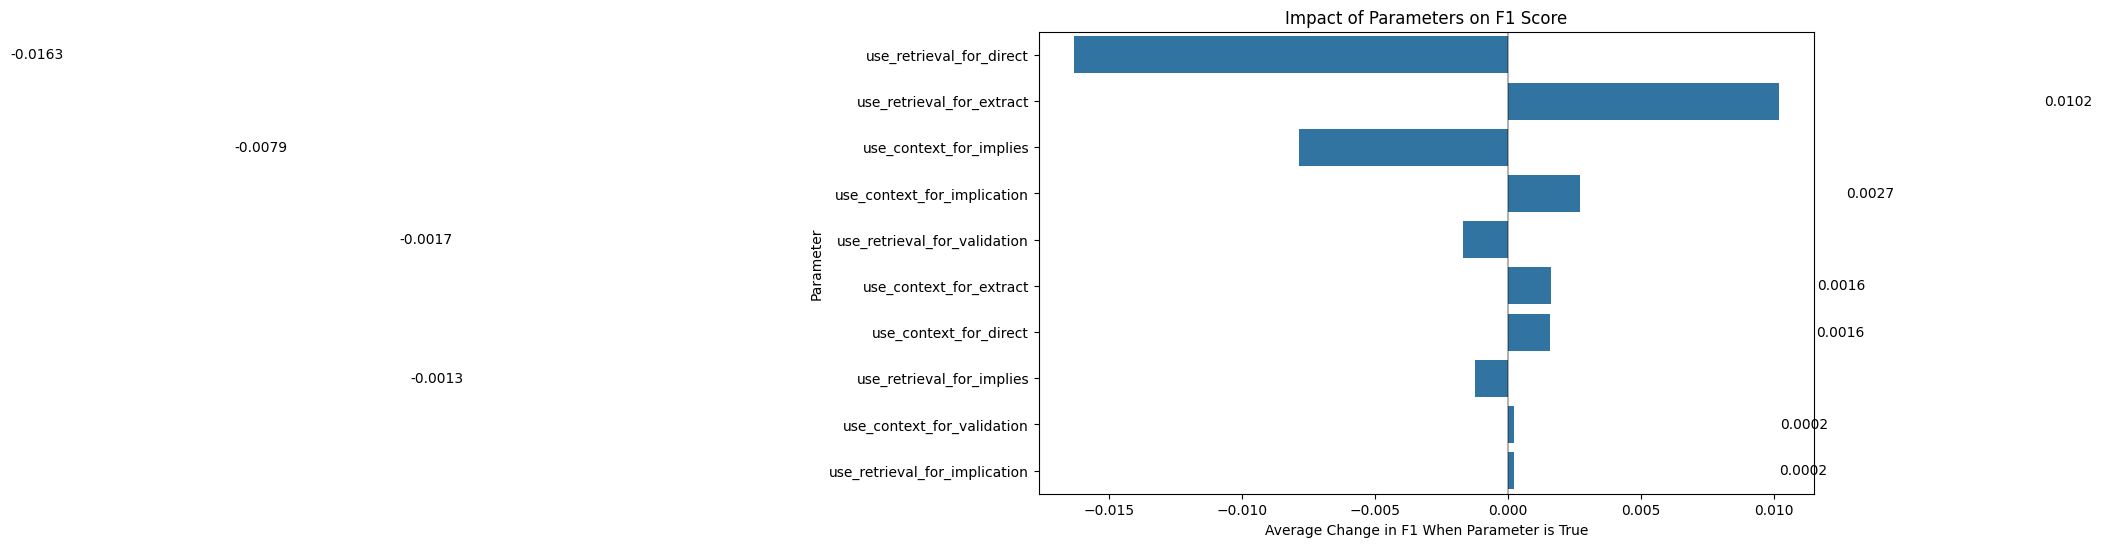

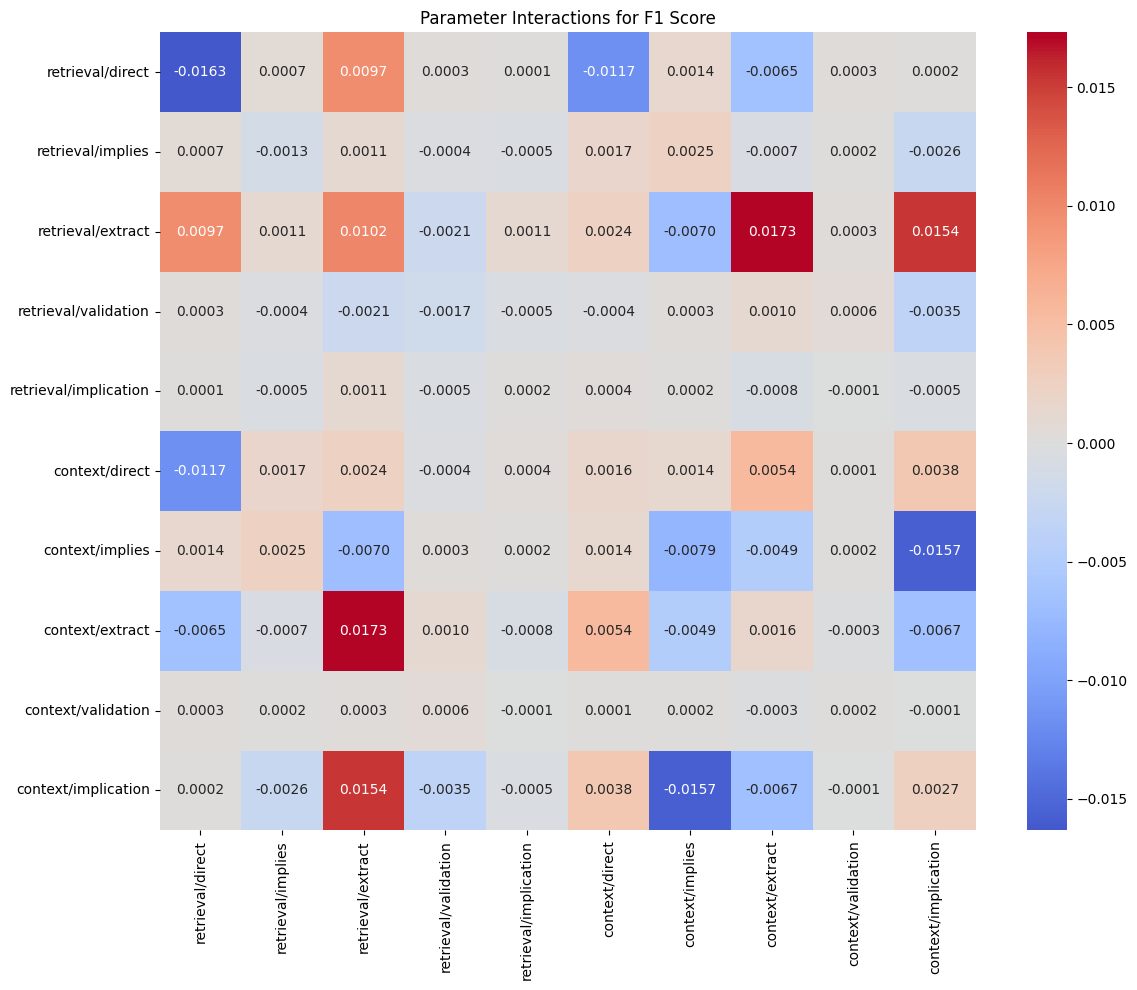


Analysis complete. Plots saved to current directory.


In [1]:
import json
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Any

class HPOResultsAnalyzer:
    """
    Analyzes HPO optimization results to determine the impact of different parameters
    on model performance.
    """
    
    def __init__(self, results_file: str):
        """
        Initialize the analyzer with the results file.
        
        Args:
            results_file: Path to the hpo_optimization_results.json file
        """
        self.results_file = results_file
        self.results = self._load_results()
        self.params = self._extract_parameter_names()
        self.df = self._create_dataframe()
        
    def _load_results(self) -> List[Dict]:
        """Load results from the JSON file."""
        with open(self.results_file, 'r') as f:
            return json.load(f)
            
    def _extract_parameter_names(self) -> List[str]:
        """Extract the parameter names from the results."""
        if not self.results:
            return []
            
        # Get parameter names from the first configuration
        config = self.results[0]['config']
        params = []
        
        # Extract flattened parameter names
        for category in ['retrieval', 'context']:
            for param in config[category].keys():
                params.append(f"use_{category}_for_{param}")
                
        return params
        
    def _create_dataframe(self) -> pd.DataFrame:
        """Convert results to a pandas DataFrame for easier analysis."""
        if not self.results:
            return pd.DataFrame()
            
        # Create rows for the DataFrame
        rows = []
        for result in self.results:
            config = result['config']
            metrics = result['metrics']
            
            # Create a flat dictionary for this configuration
            row = {}
            for category in ['retrieval', 'context']:
                for param, value in config[category].items():
                    row[f"use_{category}_for_{param}"] = value
                    
            # Add metrics
            for metric, value in metrics.items():
                row[metric] = value
                
            rows.append(row)
            
        return pd.DataFrame(rows)
        
    def analyze_parameter_importance(self, metric='f1') -> pd.DataFrame:
        """
        Analyze the importance of each parameter for a given metric.
        
        Args:
            metric: Performance metric to analyze ('f1', 'precision', or 'recall')
            
        Returns:
            DataFrame with parameter importance statistics
        """
        if not self.df.empty:
            importance = []
            
            for param in self.params:
                # Calculate average metric when parameter is True vs False
                avg_true = self.df[self.df[param] == True][metric].mean()
                avg_false = self.df[self.df[param] == False][metric].mean()
                
                # Calculate the difference (impact)
                diff = avg_true - avg_false
                
                importance.append({
                    'parameter': param,
                    'avg_when_true': avg_true,
                    'avg_when_false': avg_false,
                    'impact': diff,
                    'abs_impact': abs(diff)
                })
                
            # Convert to DataFrame and sort by absolute impact
            importance_df = pd.DataFrame(importance)
            importance_df = importance_df.sort_values('abs_impact', ascending=False)
            
            return importance_df
        return pd.DataFrame()
        
    def analyze_parameter_combinations(self, metric='f1', top_n=10) -> pd.DataFrame:
        """
        Analyze the impact of parameter combinations on performance.
        
        Args:
            metric: Performance metric to analyze ('f1', 'precision', or 'recall')
            top_n: Number of top combinations to return
            
        Returns:
            DataFrame with parameter combination statistics
        """
        if len(self.params) <= 1 or self.df.empty:
            return pd.DataFrame()
            
        # Look at pairs of parameters
        pair_importance = []
        
        for param1, param2 in combinations(self.params, 2):
            # Calculate average metric for each combination of values
            avg_true_true = self.df[(self.df[param1] == True) & (self.df[param2] == True)][metric].mean()
            avg_true_false = self.df[(self.df[param1] == True) & (self.df[param2] == False)][metric].mean()
            avg_false_true = self.df[(self.df[param1] == False) & (self.df[param2] == True)][metric].mean()
            avg_false_false = self.df[(self.df[param1] == False) & (self.df[param2] == False)][metric].mean()
            
            # Calculate interactions (how much the combination differs from individual effects)
            interaction = avg_true_true - avg_true_false - avg_false_true + avg_false_false
            
            pair_importance.append({
                'parameter_pair': f"{param1} + {param2}",
                'avg_true_true': avg_true_true,
                'avg_true_false': avg_true_false,
                'avg_false_true': avg_false_true,
                'avg_false_false': avg_false_false,
                'interaction': interaction,
                'abs_interaction': abs(interaction)
            })
            
        # Convert to DataFrame and sort
        pair_df = pd.DataFrame(pair_importance)
        pair_df = pair_df.sort_values('abs_interaction', ascending=False).head(top_n)
        
        return pair_df
        
    def find_best_config(self, metric='f1') -> Tuple[Dict, float]:
        """
        Find the best configuration based on a specific metric.
        
        Args:
            metric: Performance metric to use ('f1', 'precision', or 'recall')
            
        Returns:
            Tuple of (best_config, best_metric_value)
        """
        if self.df.empty:
            return {}, 0.0
            
        # Find the row with the highest metric value
        best_idx = self.df[metric].idxmax()
        best_row = self.df.loc[best_idx]
        
        # Extract the configuration
        config = {}
        for param in self.params:
            category, feature = self._split_param_name(param)
            if category not in config:
                config[category] = {}
            config[category][feature] = bool(best_row[param])
            
        return config, best_row[metric]
        
    def _split_param_name(self, param_name: str) -> Tuple[str, str]:
        """Split a parameter name into category and feature."""
        parts = param_name.split('_for_')
        if len(parts) != 2:
            return "unknown", "unknown"
        
        category = parts[0].replace('use_', '')
        feature = parts[1]
        
        return category, feature
        
    def plot_parameter_importance(self, metric='f1', figsize=(10, 6)):
        """
        Plot the importance of each parameter for a given metric.
        
        Args:
            metric: Performance metric to analyze ('f1', 'precision', or 'recall')
            figsize: Figure size tuple (width, height)
        """
        importance_df = self.analyze_parameter_importance(metric)
        
        if importance_df.empty:
            print("No data available for plotting")
            return
            
        plt.figure(figsize=figsize)
        
        # Create a bar plot of parameter impact
        ax = sns.barplot(x='impact', y='parameter', data=importance_df)
        
        # Add a vertical line at 0
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Add labels
        plt.title(f'Impact of Parameters on {metric.upper()} Score')
        plt.xlabel(f'Average Change in {metric.upper()} When Parameter is True')
        plt.ylabel('Parameter')
        
        # Add values on the bars
        for i, impact in enumerate(importance_df['impact']):
            ax.text(impact + (0.01 if impact >= 0 else -0.04), 
                    i, 
                    f"{impact:.4f}", 
                    va='center')
        
        plt.tight_layout()
        plt.savefig(f'parameter_importance_{metric}.png')
        plt.show()
        
    def plot_interaction_heatmap(self, metric='f1', figsize=(12, 10)):
        """
        Plot a heatmap of parameter interactions.
        
        Args:
            metric: Performance metric to analyze ('f1', 'precision', or 'recall')
            figsize: Figure size tuple (width, height)
        """
        if len(self.params) <= 1 or self.df.empty:
            print("Not enough parameters for interaction analysis")
            return
            
        # Create a matrix for the heatmap
        n_params = len(self.params)
        interaction_matrix = np.zeros((n_params, n_params))
        
        # Calculate interactions for all pairs
        for i, param1 in enumerate(self.params):
            for j, param2 in enumerate(self.params):
                if i == j:  # Diagonal - individual effect
                    avg_true = self.df[self.df[param1] == True][metric].mean()
                    avg_false = self.df[self.df[param1] == False][metric].mean()
                    interaction_matrix[i, j] = avg_true - avg_false
                else:  # Off-diagonal - interaction effect
                    avg_true_true = self.df[(self.df[param1] == True) & (self.df[param2] == True)][metric].mean()
                    avg_true_false = self.df[(self.df[param1] == True) & (self.df[param2] == False)][metric].mean()
                    avg_false_true = self.df[(self.df[param1] == False) & (self.df[param2] == True)][metric].mean()
                    avg_false_false = self.df[(self.df[param1] == False) & (self.df[param2] == False)][metric].mean()
                    
                    # Interaction effect
                    interaction_matrix[i, j] = avg_true_true - avg_true_false - avg_false_true + avg_false_false
        
        # Create more readable parameter names for the plot
        readable_params = [self._get_readable_name(param) for param in self.params]
        
        plt.figure(figsize=figsize)
        
        # Create heatmap
        sns.heatmap(interaction_matrix, 
                   annot=True, 
                   fmt=".4f", 
                   cmap="coolwarm",
                   xticklabels=readable_params,
                   yticklabels=readable_params,
                   center=0)
        
        plt.title(f'Parameter Interactions for {metric.upper()} Score')
        plt.tight_layout()
        plt.savefig(f'parameter_interactions_{metric}.png')
        plt.show()
        
    def _get_readable_name(self, param_name: str) -> str:
        """Create a more readable parameter name for plotting."""
        category, feature = self._split_param_name(param_name)
        return f"{category}/{feature}"

def analyze_results(results_file='hpo_optimization_results.json'):
    """
    Analyze HPO optimization results to determine parameter importance.
    
    Args:
        results_file: Path to the results JSON file
    """
    analyzer = HPOResultsAnalyzer(results_file)
    
    # Check if we have results loaded
    if len(analyzer.results) == 0:
        print(f"No results found in {results_file}")
        return
        
    print(f"Analyzing {len(analyzer.results)} configurations with {len(analyzer.params)} parameters")
    
    # Analyze importance for F1 score
    importance_f1 = analyzer.analyze_parameter_importance(metric='f1')
    print("\nParameter Importance for F1 Score:")
    print(importance_f1)
    
    # Analyze importance for precision
    importance_precision = analyzer.analyze_parameter_importance(metric='precision')
    print("\nParameter Importance for Precision:")
    print(importance_precision)
    
    # Analyze importance for recall
    importance_recall = analyzer.analyze_parameter_importance(metric='recall')
    print("\nParameter Importance for Recall:")
    print(importance_recall)
    
    # Analyze parameter interactions
    interactions = analyzer.analyze_parameter_combinations(metric='f1')
    print("\nTop Parameter Interactions for F1 Score:")
    print(interactions)
    
    # Find the best configuration
    best_config, best_f1 = analyzer.find_best_config(metric='f1')
    print(f"\nBest Configuration (F1: {best_f1:.4f}):")
    print(json.dumps(best_config, indent=4))
    
    # Plot importance
    print("\nGenerating plots...")
    analyzer.plot_parameter_importance(metric='f1')
    
    # If we have more than one parameter, plot interactions
    if len(analyzer.params) > 1:
        analyzer.plot_interaction_heatmap(metric='f1')
    
    print("\nAnalysis complete. Plots saved to current directory.")
    
    return analyzer

if __name__ == "__main__":
    # You can specify a different file path if needed
    analyze_results()

# Evaluation Results

In [99]:
import argparse
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from typing import List, Dict, Tuple, Optional

def normalize_text(text: str) -> str:
    """Normalize text by converting to lowercase and removing extra whitespace."""
    return ' '.join(text.lower().split())


def calculate_similarity_matrix(predictions: List[str], ground_truth: List[str], 
                               similarity_threshold: float = 80.0) -> np.ndarray:
    """
    Calculate the similarity matrix between predictions and ground truth using fuzzy matching.
    
    Args:
        predictions: List of predicted phenotypes
        ground_truth: List of ground truth phenotypes
        similarity_threshold: Minimum similarity score (0-100) to consider a potential match
        
    Returns:
        2D numpy array of similarity scores
    """
    # Normalize all texts
    norm_predictions = [normalize_text(p) for p in predictions]
    norm_ground_truth = [normalize_text(g) for g in ground_truth]
    
    # Create similarity matrix
    similarity_matrix = np.zeros((len(norm_predictions), len(norm_ground_truth)))
    
    for i, pred in enumerate(norm_predictions):
        for j, truth in enumerate(norm_ground_truth):
            similarity = fuzz.ratio(pred, truth)
            # Only consider matches above threshold
            if similarity >= similarity_threshold:
                similarity_matrix[i, j] = similarity
    
    return similarity_matrix


def find_best_matches(similarity_matrix: np.ndarray) -> List[Tuple[int, int, float]]:
    """
    Find the best matches between predictions and ground truth using a greedy approach.
    
    Args:
        similarity_matrix: 2D array of similarity scores
        
    Returns:
        List of (pred_idx, truth_idx, similarity) tuples representing the matches
    """
    matches = []
    
    # Create a copy to modify
    sim_matrix = similarity_matrix.copy()
    
    # While there are non-zero elements in the matrix
    while np.max(sim_matrix) > 0:
        # Find the highest similarity
        max_val = np.max(sim_matrix)
        max_pos = np.unravel_index(np.argmax(sim_matrix), sim_matrix.shape)
        
        # Add the match
        pred_idx, truth_idx = max_pos
        matches.append((pred_idx, truth_idx, max_val))
        
        # Mark the row and column as used
        sim_matrix[pred_idx, :] = 0
        sim_matrix[:, truth_idx] = 0
    
    return matches


def calculate_soft_f1(predictions: List[str], ground_truth: List[str], 
                     similarity_threshold: float = 80.0) -> Dict[str, float]:
    """
    Calculate soft precision, recall, and F1 score using fuzzy matching.
    
    Args:
        predictions: List of predicted phenotypes
        ground_truth: List of ground truth phenotypes
        similarity_threshold: Minimum similarity score to consider a potential match
        
    Returns:
        Dictionary with precision, recall, F1 score, matched pairs, and counts of false positives/negatives
    """
    # Handle empty lists
    if not predictions or not ground_truth:
        return {
            "precision": 0.0 if predictions else 1.0,
            "recall": 0.0 if ground_truth else 1.0,
            "f1_score": 0.0 if (not predictions or not ground_truth) else 1.0,
            "matches": [],
            "false_positives": len(predictions),
            "false_negatives": len(ground_truth)
        }
    
    # Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(predictions, ground_truth, similarity_threshold)
    
    # Find best matches
    matches = find_best_matches(similarity_matrix)
    
    # Calculate weighted TP (true positives)
    weighted_tp = sum(similarity / 100.0 for _, _, similarity in matches)
    
    # Calculate metrics
    precision = weighted_tp / len(predictions) if predictions else 0.0
    recall = weighted_tp / len(ground_truth) if ground_truth else 0.0
    
    f1 = 0.0
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    # Calculate false positives and false negatives
    # False positives: predictions that didn't match any ground truth
    matched_pred_indices = set(pred_idx for pred_idx, _, _ in matches)
    false_positives = len(predictions) - len(matched_pred_indices)
    
    # False negatives: ground truth items that weren't matched by any prediction
    matched_truth_indices = set(truth_idx for _, truth_idx, _ in matches)
    false_negatives = len(ground_truth) - len(matched_truth_indices)
    
    # Create detailed match information
    match_details = []
    for pred_idx, truth_idx, similarity in matches:
        match_details.append({
            "prediction": predictions[pred_idx],
            "ground_truth": ground_truth[truth_idx],
            "similarity": similarity
        })
    
    return {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "matches": match_details,
        "false_positives": false_positives,
        "false_negatives": false_negatives
    }


def print_results(results: Dict[str, float], show_matches: bool = False) -> None:
    """Print the evaluation results."""
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1 Score: {results['f1_score']:.4f}")
    print(f"False Positives: {results['false_positives']}")
    print(f"False Negatives: {results['false_negatives']}")
    
    if show_matches and results['matches']:
        print("\nMatched Pairs:")
        for match in results['matches']:
            print(f"- Prediction: '{match['prediction']}' → Ground Truth: '{match['ground_truth']}' (Similarity: {match['similarity']:.1f}%)")


def evaluate_results_file(ground_truth_file: str, predictions_file: str, 
                         similarity_threshold: float = 80.0,
                         output_file: Optional[str] = None,
                         verbose: bool = False) -> Dict[str, float]:
    """
    Evaluate results by reading from files.
    
    Args:
        ground_truth_file: Path to file with ground truth phenotypes (one per line)
        predictions_file: Path to file with predicted phenotypes (one per line)
        similarity_threshold: Minimum similarity score to consider a potential match
        output_file: Optional path to save detailed results
        verbose: Whether to print detailed match information
    
    Returns:
        Dictionary with precision, recall, F1 score
    """
    # Read files
    with open(ground_truth_file, 'r') as f:
        ground_truth = [line.strip() for line in f if line.strip()]
    
    with open(predictions_file, 'r') as f:
        predictions = [line.strip() for line in f if line.strip()]
    
    # Calculate metrics
    results = calculate_soft_f1(predictions, ground_truth, similarity_threshold)
    
    # Print results
    print(f"Evaluated {len(predictions)} predictions against {len(ground_truth)} ground truth items")
    print(f"Using similarity threshold: {similarity_threshold}%")
    print_results(results, verbose)
    
    # Save detailed results if requested
    if output_file:
        output_df = pd.DataFrame(results['matches'])
        output_df.to_csv(output_file, index=False)
        print(f"Detailed results saved to {output_file}")
    
    return results


def compare_result_sets(ground_truth: List[str], result_set_a: List[str], result_set_b: List[str],
                       similarity_threshold: float = 80.0) -> None:
    """
    Compare two sets of results against the same ground truth.
    
    Args:
        ground_truth: List of ground truth phenotypes
        result_set_a: First set of result phenotypes
        result_set_b: Second set of result phenotypes
        similarity_threshold: Minimum similarity score to consider a potential match
    """
    # Calculate metrics for both result sets
    results_a = calculate_soft_f1(result_set_a, ground_truth, similarity_threshold)
    results_b = calculate_soft_f1(result_set_b, ground_truth, similarity_threshold)
    
    # Print comparison
    print("=== Results Set A ===")
    print(f"Number of predictions: {len(result_set_a)}")
    print_results(results_a, False)
    
    print("\n=== Results Set B ===")
    print(f"Number of predictions: {len(result_set_b)}")
    print_results(results_b, False)
    
    # Determine which is better
    if results_a['f1_score'] > results_b['f1_score']:
        print("\nResults Set A has a higher F1 score")
    elif results_b['f1_score'] > results_a['f1_score']:
        print("\nResults Set B has a higher F1 score")
    else:
        print("\nBoth result sets have the same F1 score")
        
    # Calculate the difference
    f1_diff = abs(results_a['f1_score'] - results_b['f1_score'])
    print(f"F1 Score difference: {f1_diff:.4f}")
compare_result_sets(ground_truth, single_stage_results, multistage_results, similarity_threshold=50.0)
# compare_result_sets(ground_truth, multistage_results, ground_truth, similarity_threshold=50.0)
# extracted_entities = []
# for entity in extracted[0]:
#     extracted_entities.append(entity["entity"])

# compare_result_sets(ground_truth, single_stage_results, extracted_entities, similarity_threshold=50.0)
# Evaluate the result


=== Results Set A ===
Number of predictions: 51
Precision: 0.6055
Recall: 0.6433
F1 Score: 0.6238
False Positives: 16
False Negatives: 13

=== Results Set B ===
Number of predictions: 60
Precision: 0.5683
Recall: 0.7104
F1 Score: 0.6315
False Positives: 20
False Negatives: 8

Results Set B has a higher F1 score
F1 Score difference: 0.0076


# Evaluation Code

In [84]:
import argparse
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from typing import List, Dict, Tuple, Optional, Set
from collections import Counter

def normalize_text(text: str) -> str:
    """Normalize text by converting to lowercase and removing extra whitespace."""
    return ' '.join(text.lower().split())


def calculate_similarity_matrix(predictions: List[str], ground_truth: List[str], 
                               similarity_threshold: float = 80.0) -> np.ndarray:
    """
    Calculate the similarity matrix between predictions and ground truth using fuzzy matching.
    
    Args:
        predictions: List of predicted phenotypes
        ground_truth: List of ground truth phenotypes
        similarity_threshold: Minimum similarity score (0-100) to consider a potential match
        
    Returns:
        2D numpy array of similarity scores
    """
    # Create similarity matrix
    similarity_matrix = np.zeros((len(predictions), len(ground_truth)))
    
    for i, pred in enumerate(predictions):
        for j, truth in enumerate(ground_truth):
            similarity = fuzz.ratio(normalize_text(pred), normalize_text(truth))
            # Only consider matches above threshold
            if similarity >= similarity_threshold:
                similarity_matrix[i, j] = similarity
    
    return similarity_matrix


def find_best_matches(similarity_matrix: np.ndarray) -> List[Tuple[int, int, float]]:
    """
    Find the best matches between predictions and ground truth using a greedy approach.
    
    Args:
        similarity_matrix: 2D array of similarity scores
        
    Returns:
        List of (pred_idx, truth_idx, similarity) tuples representing the matches
    """
    matches = []
    
    # Create a copy to modify
    sim_matrix = similarity_matrix.copy()
    
    # While there are non-zero elements in the matrix
    while np.max(sim_matrix) > 0:
        # Find the highest similarity
        max_val = np.max(sim_matrix)
        max_pos = np.unravel_index(np.argmax(sim_matrix), sim_matrix.shape)
        
        # Add the match
        pred_idx, truth_idx = max_pos
        matches.append((pred_idx, truth_idx, max_val))
        
        # Mark the row and column as used
        sim_matrix[pred_idx, :] = 0
        sim_matrix[:, truth_idx] = 0
    
    return matches


def set_based_evaluation(predictions: List[str], ground_truth: List[str],
                         similarity_threshold: float = 80.0) -> Dict:
    """
    Evaluates predictions against ground truth using set operations and fuzzy matching.
    
    Args:
        predictions: List of predicted phenotypes (can contain duplicates)
        ground_truth: List of ground truth phenotypes (can contain duplicates)
        similarity_threshold: Minimum similarity score to consider a potential match
        
    Returns:
        Dictionary with precision, recall, F1 scores and detailed match information
    """
    # First, deduplicate both lists
    unique_predictions = list(set(predictions))
    unique_ground_truth = list(set(ground_truth))
    
    # Store original counts for reference
    pred_counter = Counter(predictions)
    truth_counter = Counter(ground_truth)
    
    # Handle empty sets
    if not unique_predictions or not unique_ground_truth:
        return {
            "precision": 0.0 if unique_predictions else 1.0,
            "recall": 0.0 if unique_ground_truth else 1.0,
            "f1_score": 0.0,
            "matches": [],
            "false_positives": unique_predictions,
            "false_negatives": unique_ground_truth,
            "pred_counter": pred_counter,
            "truth_counter": truth_counter,
            "unique_pred_count": len(unique_predictions),
            "unique_truth_count": len(unique_ground_truth),
            "total_pred_count": len(predictions),
            "total_truth_count": len(ground_truth)
        }
    
    # Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(unique_predictions, unique_ground_truth, similarity_threshold)
    
    # Find best matches
    matches = find_best_matches(similarity_matrix)
    
    # Create match details
    match_details = []
    matched_pred_indices = set()
    matched_truth_indices = set()
    
    for pred_idx, truth_idx, similarity in matches:
        pred_text = unique_predictions[pred_idx]
        truth_text = unique_ground_truth[truth_idx]
        
        match_details.append({
            "prediction": pred_text,
            "ground_truth": truth_text,
            "similarity": similarity,
            "pred_count": pred_counter[pred_text],
            "truth_count": truth_counter[truth_text]
        })
        
        matched_pred_indices.add(pred_idx)
        matched_truth_indices.add(truth_idx)
    
    # Identify false positives and negatives using set operations
    false_positive_indices = set(range(len(unique_predictions))) - matched_pred_indices
    false_negative_indices = set(range(len(unique_ground_truth))) - matched_truth_indices
    
    false_positives = [unique_predictions[i] for i in false_positive_indices]
    false_negatives = [unique_ground_truth[i] for i in false_negative_indices]
    
    # Calculate metrics based on unique items (set-based)
    tp_count = len(matched_pred_indices)
    fp_count = len(false_positives)
    fn_count = len(false_negatives)
    
    # Calculate weighted true positives based on similarity scores
    weighted_tp = sum(similarity / 100.0 for _, _, similarity in matches)
    
    # Calculate precision and recall
    precision = weighted_tp / len(unique_predictions) if unique_predictions else 0.0
    recall = weighted_tp / len(unique_ground_truth) if unique_ground_truth else 0.0
    
    # Calculate F1 score
    f1 = 0.0
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    return {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "matches": match_details,
        "false_positives": false_positives,
        "false_negatives": false_negatives,
        "tp_count": tp_count,
        "fp_count": fp_count,
        "fn_count": fn_count,
        "weighted_tp": weighted_tp,
        "pred_counter": pred_counter,
        "truth_counter": truth_counter,
        "unique_pred_count": len(unique_predictions),
        "unique_truth_count": len(unique_ground_truth),
        "total_pred_count": len(predictions),
        "total_truth_count": len(ground_truth)
    }


def print_set_evaluation(results: Dict, show_matches: bool = True) -> None:
    """Print the set-based evaluation results."""
    print("=== Set-Based Evaluation Results ===")
    print(f"Predictions: {results['total_pred_count']} total, {results['unique_pred_count']} unique")
    print(f"Ground Truth: {results['total_truth_count']} total, {results['unique_truth_count']} unique")
    print("\nMetrics (based on unique items):")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1 Score: {results['f1_score']:.4f}")
    print(f"True Positives: {results['tp_count']} (weighted: {results['weighted_tp']:.2f})")
    print(f"False Positives: {results['fp_count']}")
    print(f"False Negatives: {results['fn_count']}")
    
    if show_matches and results['matches']:
        print("\nMatched Pairs:")
        for match in results['matches']:
            print(f"- Prediction: '{match['prediction']}' → Ground Truth: '{match['ground_truth']}' (Similarity: {match['similarity']:.1f}%)")
            
            # Show original counts
            pred_count = match.get('pred_count', 1)
            truth_count = match.get('truth_count', 1)
            if pred_count > 1 or truth_count > 1:
                print(f"  Original counts: Prediction: {pred_count}x, Ground Truth: {truth_count}x")
    
    if results['false_positives']:
        print("\nFalse Positives (unique predictions without matches):")
        for item in results['false_positives']:
            count = results['pred_counter'][item]
            print(f"- '{item}'" + (f" ({count}x in original list)" if count > 1 else ""))
    
    if results['false_negatives']:
        print("\nFalse Negatives (unique ground truth items without matches):")
        for item in results['false_negatives']:
            count = results['truth_counter'][item]
            print(f"- '{item}'" + (f" ({count}x in original list)" if count > 1 else ""))


def compare_set_based(ground_truth: List[str], result_set_a: List[str], result_set_b: List[str],
                     similarity_threshold: float = 80.0) -> Tuple[Dict, Dict]:
    """
    Compare two sets of results against the same ground truth using set-based evaluation.
    
    Args:
        ground_truth: List of ground truth phenotypes
        result_set_a: First set of result phenotypes
        result_set_b: Second set of result phenotypes
        similarity_threshold: Minimum similarity score to consider a potential match
        
    Returns:
        Tuple of (results_a, results_b) dictionaries
    """
    # First, print statistics about duplicates
    print("=== Dataset Statistics ===")
    print(f"Ground Truth: {len(ground_truth)} total, {len(set(ground_truth))} unique")
    print(f"Result Set A: {len(result_set_a)} total, {len(set(result_set_a))} unique")
    print(f"Result Set B: {len(result_set_b)} total, {len(set(result_set_b))} unique")
    
    # Calculate metrics for both result sets
    results_a = set_based_evaluation(result_set_a, ground_truth, similarity_threshold)
    results_b = set_based_evaluation(result_set_b, ground_truth, similarity_threshold)
    
    # Print comparison
    print("\n=== Results for Set A ===")
    print_set_evaluation(results_a, show_matches=True)
    
    print("\n=== Results for Set B ===")
    print_set_evaluation(results_b, show_matches=True)
    
    # Determine which is better
    if results_a['f1_score'] > results_b['f1_score']:
        print("\nResults Set A has a higher F1 score")
    elif results_b['f1_score'] > results_a['f1_score']:
        print("\nResults Set B has a higher F1 score")
    else:
        print("\nBoth result sets have the same F1 score")
        
    # Calculate the difference
    f1_diff = abs(results_a['f1_score'] - results_b['f1_score'])
    print(f"F1 Score difference: {f1_diff:.4f}")
    
    return results_a, results_b


def example_set_based_evaluation():
    """Run an example of set-based evaluation with duplicates."""
    # Original lists with duplicates
    ground_truth = [
        "Seizure disorder", 
        "Developmental delay",
        "Macrocephaly",
        "Developmental delay",  # Duplicate
        "Hypotonia",
        "Developmental delay"   # Another duplicate
    ]
    
    predictions = [
        "Seizures",                   # Similar to "Seizure disorder"
        "Global developmental delay",  # Similar to "Developmental delay"
        "Developmental delay",         # Exact match with "Developmental delay"
        "Developmental delay",         # Duplicate
        "Autism spectrum disorder",    # False positive
        "Autism spectrum disorder",    # Duplicate false positive
        "Low muscle tone"              # Similar to "Hypotonia"
    ]
    
    # Run set-based evaluation
    print("Example of set-based evaluation with duplicates:")
    results = set_based_evaluation(predictions, ground_truth, similarity_threshold=70.0)
    print_set_evaluation(results)
    
    return results


results = set_based_evaluation(single_stage_results, ground_truth, similarity_threshold=50.0)
print_set_evaluation(results)
results = set_based_evaluation(multistage_results, ground_truth, similarity_threshold=50.0)
print_set_evaluation(results)

=== Set-Based Evaluation Results ===
Predictions: 51 total, 51 unique
Ground Truth: 48 total, 47 unique

Metrics (based on unique items):
Precision: 0.6073
Recall: 0.6589
F1 Score: 0.6320
True Positives: 35 (weighted: 30.97)
False Positives: 16
False Negatives: 12

Matched Pairs:
- Prediction: 'cardiomegaly' → Ground Truth: 'cardiomegaly' (Similarity: 100.0%)
- Prediction: 'dilated left ventricular cavity' → Ground Truth: 'dilated left ventricular cavity' (Similarity: 100.0%)
- Prediction: 'vomiting' → Ground Truth: 'vomiting' (Similarity: 100.0%)
- Prediction: 'left ventricular hypertrophy' → Ground Truth: 'left ventricular hypertrophy' (Similarity: 100.0%)
- Prediction: 'disruption of glomerular basement membrane' → Ground Truth: 'disruption of glomerular basement membrane' (Similarity: 100.0%)
- Prediction: 'discontinuity of lamina densa' → Ground Truth: 'discontinuity of lamina densa' (Similarity: 100.0%)
- Prediction: 'hypertension' → Ground Truth: 'hypertension' (Similarity: 100.

In [97]:
def analyze_method_phenotype_distribution(results):
    # Track methods and their associated phenotypes
    method_phenotype_map = {}
    
    # Count occurrences of each method
    method_counts = {}
    
    # Count total phenotypes per method
    method_unique_phenotypes = {}
    
    # Process each result
    for result in results:
        method = result.get('method')
        phenotype = result.get('phenotype')
        
        if not method or not phenotype:
            continue
            
        # Add method to tracking dictionaries if not already present
        if method not in method_phenotype_map:
            method_phenotype_map[method] = set()
            method_counts[method] = 0
            method_unique_phenotypes[method] = set()
        
        # Add this phenotype to the set for this method
        method_phenotype_map[method].add(phenotype)
        
        # Increment the count for this method
        method_counts[method] += 1
        
        # Add to unique phenotypes for this method
        method_unique_phenotypes[method].add(phenotype)
    
    # Print summary results
    print("=== Method Distribution Analysis ===")
    print(f"Total unique methods found: {len(method_counts)}")
    print("\nMethods found:")
    for method in sorted(method_counts.keys()):
        print(f"  - {method}")
    
    print("\n=== Method Count Distribution ===")
    for method, count in sorted(method_counts.items(), key=lambda x: x[1], reverse=True):
        unique_count = len(method_unique_phenotypes[method])
        print(f"{method}: {count} occurrences, {unique_count} unique phenotypes")
    
    print("\n=== Phenotypes by Method ===")
    for method in sorted(method_phenotype_map.keys()):
        print(f"\nMethod: {method}")
        print(f"Unique phenotypes ({len(method_phenotype_map[method])}):")
        for phenotype in sorted(method_phenotype_map[method]):
            print(f"  - {phenotype}")
            
    # Return the data structures for further analysis if needed
    return {
        "method_counts": method_counts,
        "method_phenotype_map": method_phenotype_map,
        "method_unique_phenotypes": method_unique_phenotypes
    }

In [107]:
analysis_results = analyze_method_phenotype_distribution(results)

AttributeError: 'list' object has no attribute 'get'

# Matcher

In [12]:
from typing import List, Dict, Any, Optional, Union
import json
import pandas as pd
import re
from datetime import datetime
from hporag.hpo_match import RAGHPOMatcher

class HPOMatcher:
    """
    Matches verified phenotype entities to HPO terms.
    
    This class takes verified entities with their contexts and matches them
    to appropriate HPO terms from the ontology.
    """
    
    def __init__(self, embeddings_manager, llm_client, system_message, debug=False):
        """
        Initialize the HPO matcher.
        
        Args:
            embeddings_manager: For creating and managing embeddings
            llm_client: For LLM queries during matching
            system_message: System message for the HPO term matching
            debug: Whether to enable debug output
        """
        self.embeddings_manager = embeddings_manager
        self.llm_client = llm_client
        self.system_message = system_message
        self.debug = debug
        
        # Initialize the RAG matcher
        self.matcher = RAGHPOMatcher(
            embeddings_manager=embeddings_manager,
            llm_client=llm_client,
            system_message=system_message
        )
        
        # Initialize embedded documents container
        self.embedded_documents = None
    
    def _debug_print(self, message: str, level: int = 0):
        """Print debug message with timestamp."""
        if self.debug:
            indent = "  " * level
            print(f"{datetime.now().strftime('%H:%M:%S')} | {indent}{message}")
    
    def prepare_index(self, embedded_documents: List[Dict]):
        """
        Prepare index for matching.
        
        Args:
            embedded_documents: HPO term embeddings
        """
        self._debug_print("Preparing index for HPO matching...")
        self.embedded_documents = embedded_documents
        self.matcher.prepare_index(embedded_documents)
        self._debug_print(f"Index prepared with {len(embedded_documents)} embedded documents")
    
    # Fix for the HPOMatcher class - update this method in your HPO matcher code
    def match_entities(self, verified_entities: List[Dict]) -> List[Dict]:
        """
        Match verified entities to HPO terms.
        
        Args:
            verified_entities: List of dictionaries with 'entity' and 'context' keys
            
        Returns:
            List of dictionaries with matching results
        """
        # Fixed check for embedded_documents
        if self.embedded_documents is None:
            raise ValueError("Embedded documents not loaded. Call prepare_index() first.")
            
        self._debug_print(f"Matching {len(verified_entities)} verified entities to HPO terms")
        
        # Extract entity texts and contexts
        entity_texts = [item['entity'] for item in verified_entities]
        contexts = [item['context'] for item in verified_entities]
        
        # Match to HPO terms
        matches = self.matcher.match_hpo_terms(
            entities=entity_texts,
            metadata=self.embedded_documents,
            original_sentences=contexts
        )
        
        # Add patient_id or note_id if present in verified entities
        for i, match in enumerate(matches):
            if i < len(verified_entities):
                # Copy any additional metadata from the verified entity
                for key, value in verified_entities[i].items():
                    if key not in ['entity', 'context'] and key not in match:
                        match[key] = value
        
        self._debug_print(f"Found {len(matches)} HPO term matches")
        return matches
    
    def match_batch(self, verified_entities_batch: List[List[Dict]]) -> List[List[Dict]]:
        """
        Match multiple batches of verified entities.
        
        Args:
            verified_entities_batch: List of lists of verified entity dictionaries
            
        Returns:
            List of lists of matching results
        """
        batch_results = []
        
        for i, verified_entities in enumerate(verified_entities_batch):
            self._debug_print(f"Processing batch {i+1}/{len(verified_entities_batch)}")
            matches = self.match_entities(verified_entities)
            batch_results.append(matches)
        
        return batch_results
    
    def format_results(self, matches: List[Dict], include_candidates: bool = True) -> pd.DataFrame:
        """
        Format HPO term matching results into a clean DataFrame.
        
        Args:
            matches: Results from match_entities
            include_candidates: Whether to include the top 5 candidates
            
        Returns:
            DataFrame with HPO term matching results
        """
        formatted_results = []
        
        for match in matches:
            result = {
                'entity': match.get('entity', ''),
                'context': match.get('original_context', match.get('context', '')),
                'hpo_term': match.get('hpo_term', ''),
                'match_method': match.get('match_method', ''),
                'confidence_score': match.get('confidence_score', 0.0)
            }
            
            # Copy any additional fields (like patient_id or note_id)
            for key, value in match.items():
                if key not in ['entity', 'context', 'original_context', 'hpo_term', 'match_method', 
                               'confidence_score', 'top_candidates']:
                    result[key] = value
            
            # Add top candidates if requested
            if include_candidates and 'top_candidates' in match:
                top_candidates = match['top_candidates'][:5] if match['top_candidates'] else []
                
                for i, candidate in enumerate(top_candidates):
                    idx = i + 1
                    metadata = candidate.get('metadata', {})
                    result[f'candidate_{idx}_term'] = metadata.get('info', '')
                    result[f'candidate_{idx}_id'] = metadata.get('hp_id', '')
                    result[f'candidate_{idx}_score'] = candidate.get('similarity_score', 0.0)
            
            formatted_results.append(result)
        
        # Create DataFrame
        return pd.DataFrame(formatted_results)

In [13]:
# 1. Import required modules
import numpy as np
import pandas as pd
from utils.embedding import EmbeddingsManager
from utils.llm_client import LocalLLMClient
import json

# 2. Initialize embedding manager
embedding_manager = EmbeddingsManager(
    model_type="sentence_transformer",
    model_name="abhinand/MedEmbed-small-v0.1",
    device="cuda"  # Use "cpu" if GPU is not available
)

# 4. Load system prompts
with open("data/prompts/system_prompts.json", "r") as f:
    prompts = json.load(f)
    system_message_matching = prompts["system_message_II"]

# 5. Initialize the HPOMatcher
matcher = HPOMatcher(
    embeddings_manager=embedding_manager,
    llm_client=llm_client,
    system_message=system_message_matching,
    debug=True  # Set to False to disable detailed logging
)

# 6. Load HPO embeddings
embeddings_file = "data/vector_stores/G2GHPO_metadata_medembed.npy"  # Adjust path as needed
embedded_documents = np.load(embeddings_file, allow_pickle=True)

# 7. Prepare the matcher index
matcher.prepare_index(embedded_documents)

# 8. Match verified entities to HPO terms
# Assuming verified_entities is your list of dictionaries with 'entity' and 'context' keys
matches = matcher.match_entities(verified_entities)

Loading model...
Model type: sentence_transformer
Model name: abhinand/MedEmbed-small-v0.1
Device: cuda
Initializing SentenceTransformer with model: abhinand/MedEmbed-small-v0.1 on device: cuda
Model successfully moved to cuda
Verifying model by embedding sample text...
Model initialized successfully. Embedding dimension: 384
12:26:39 | Preparing index for HPO matching...
12:26:40 | Index prepared with 61401 embedded documents
12:26:40 | Matching 55 verified entities to HPO terms


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

12:27:14 | Found 55 HPO term matches


In [20]:
# print(matches)
for match in matches:
    print(f"Entity: {match['entity']}")
    print(f"hp_id: {match['hpo_term']}")

Entity: anisocytosis
hp_id: HP:0011273
Entity: bilateral sensorineural hearing loss
hp_id: HP:0008619
Entity: mean corpuscular volume
hp_id: HP:0025065
Entity: cortical echogenecity
hp_id: HP:0033132
Entity: vomiting
hp_id: HP:0002013
Entity: suprapubic tenderness
hp_id: HP:0025283
Entity: anuria
hp_id: HP:0100519
Entity: bibasilar end-inspiratory crepitations
hp_id: HP:0031996
Entity: bilateral pale fundi
hp_id: HP:0001487
Entity: cardiomegaly
hp_id: HP:0001640
Entity: multiple yellowish white lesion-like flecks
hp_id: HP:0032027
Entity: white cell count
hp_id: HP:0001974
Entity: hypertension
hp_id: HP:0000822
Entity: low-grade fever
hp_id: HP:0011134
Entity: normocytic normochromic anaemia
hp_id: HP:0001895
Entity: corticomedullary differentiation
hp_id: HP:0005564
Entity: crepitations
hp_id: HP:0030830
Entity: dilated left ventricular cavity
hp_id: HP:4000141
Entity: proteinuria
hp_id: HP:0000093
Entity: renal disease
hp_id: HP:0000112
Entity: basket weaving pattern
hp_id: HP:002539

# HPO Triplets Extraction

In [6]:
import json
from typing import Dict, List, Optional, Union
from pathlib import Path
from datetime import datetime

def extract_disease_by_id(file_path: str, target_id: str) -> Optional[Dict]:
    """
    Extract a specific disease entry from the RareDisease_Phenotype_Triples.json file by ID.
    
    Args:
        file_path: Path to the triples JSON file
        target_id: The ORPHA ID to search for (e.g., 'ORPHA:98249')
        
    Returns:
        Complete original dictionary if found, None otherwise
    """
    try:
        with open(file_path) as f:
            triples_data = json.load(f)
            
        # Normalize target ID format (handle case sensitivity)
        target_id = target_id.upper() if target_id.startswith('orpha:') else target_id
            
        # Search for the target ID and return complete original entry
        for triple in triples_data:
            if triple['source']['id'] == target_id:
                return triple
                
        print(f"No disease found with ID: {target_id}")
        return None
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

def extract_disease_by_name(
    file_path: str, 
    condition_name: str, 
    partial_match: bool = True,
    case_sensitive: bool = False
) -> List[Dict]:
    """
    Extract complete disease entries that match a given condition name.
    
    Args:
        file_path: Path to the triples JSON file
        condition_name: The name of the condition to search for
        partial_match: If True, includes partial matches of the name
        case_sensitive: If True, performs case-sensitive matching
        
    Returns:
        List of complete original dictionaries for matching diseases
    """
    try:
        with open(file_path) as f:
            triples_data = json.load(f)
            
        matches = []
        search_term = condition_name if case_sensitive else condition_name.lower()
        print("Total Triples:", len(triples_data))
        for triple in triples_data:
            # Check each name in the disease's name list
            for name in triple['source']['name']:
                compare_name = name if case_sensitive else name.lower()
                
                # Determine if there's a match based on settings
                is_match = (
                    (partial_match and search_term in compare_name) or
                    (not partial_match and search_term == compare_name)
                )
                
                if is_match:
                    # Add search metadata without modifying original structure
                    result = triple
                    matches.append(result)
                    break  # Skip to next triple once we find a match
                    
        if not matches:
            print(f"No diseases found matching: {condition_name}")
        else:
            print(f"Found {len(matches)} matching diseases")
            
        return matches
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return []
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

def save_results_to_jsonl(
    results: Union[List[Dict], Dict], 
    output_path: str,
    append: bool = False
) -> None:
    """
    Save complete search results to a JSONL file.
    
    Args:
        results: List of dictionaries or single dictionary containing search results
        output_path: Path where to save the JSONL file
        append: If True, append to existing file; if False, create new file
    """
    try:
        # Convert single result to list
        if isinstance(results, dict):
            results = [results]
            
        # Ensure we have results to save
        if not results:
            print("No results to save")
            return
            
        # Create output directory if it doesn't exist
        output_dir = Path(output_path).parent
        output_dir.mkdir(parents=True, exist_ok=True)
        
        # Write results
        mode = 'a' if append else 'w'
        with open(output_path, mode, encoding='utf-8') as f:
            for result in results:
                json_line = json.dumps(result, ensure_ascii=False)
                f.write(json_line + '\n')
                
        print(f"Successfully saved {len(results)} results to {output_path}")
        
    except Exception as e:
        print(f"Error saving results: {str(e)}")

# Example usage in Jupyter notebook:
file_path = "data/ontology/RareDisease_Phenotype_Triples.json"
output_path = "output/ehlers_danlos_complete.jsonl"

# # Search by name and save complete entries
matches = extract_disease_by_name(file_path, "Ehlers-Danlos syndrome")
save_results_to_jsonl(matches, output_path)

# # Read and analyze results
# def display_result_summary(result):
#     original_data = result['original_data']
#     metadata = result['search_metadata']
#     print(f"\nMatched name: {metadata['matched_name']}")
#     print(f"ORPHA ID: {original_data['source']['id']}")
#     print(f"All names: {', '.join(original_data['source']['name'])}")
#     print(f"Number of phenotypes: {len(original_data.get('phenotypes', []))}")
#
# with open(output_path, 'r', encoding='utf-8') as f:
#     for line in f:
#         result = json.loads(line)
#         display_result_summary(result)

Total Triples: 114994
Found 977 matching diseases
Successfully saved 977 results to output/ehlers_danlos_complete.jsonl
